
**Add useful Libraries and data reading**



In [1]:
import pandas as pd
import numpy as np
import plotnine
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from sklearn.preprocessing import MinMaxScaler





In [2]:
data = pd.read_excel("Dataset2Use_Assignment1.xlsx")
normal_col_names = data.columns
new_col_names = ['index1', 'index2', 'index3' , 'index4' , 'index5' ,'index6', 'index7', 'index8', 'bin_index1', 'bin_index2' , 'bin_index3' , 'status' , 'year']
#data2.columns = new_col_names
data.head()


,365* ( Β.Υ / Κοστ.Πωλ ),Λειτ.Αποτ/Συν.Ενεργ. (ROA),ΧΡΗΜ.ΔΑΠΑΝΕΣ / ΠΩΛΗΣΕΙΣ,ΠΡΑΓΜΑΤΙΚΗ ΡΕΥΣΤΟΤΗΤΑ : (ΚΕ-ΑΠΟΘΕΜΑΤΑ) / Β.Υ,(ΑΠΑΙΤ.*365) / ΠΩΛ.,Συν.Υποχρ/Συν.Ενεργ,Διάρκεια Παραμονής Αποθεμάτων,Λογαριθμος Προσωπικού,ΕΝΔΕΙΞΗ ΕΞΑΓΩΓΩΝ,ΕΝΔΕΙΞΗ ΕΙΣΑΓΩΓΩΝ,ΕΝΔΕΙΞΗ ΑΝΤΙΠΡΟΣΩΠΕΙΩΝ,ΕΝΔΕΙΞΗ ΑΣΥΝΕΠΕΙΑΣ (=2) (ν+1),ΕΤΟΣ
0,1014.128862,0.011751,0.038505,0.965479,567.866550,0.532258,545.195964,0.301030,0,1,0,1,2006
1,561.974631,0.099662,0.015775,1.415467,335.917481,0.660556,7.950910,1.176091,1,1,1,1,2006
2,826.919025,0.009594,0.093562,1.575034,350.618086,0.550912,28.602221,1.204120,0,1,1,1,2006
3,493.176956,0.196284,0.000581,1.346780,414.508709,0.683717,1.216888,1.431364,0,0,0,1,2006
4,100.421465,0.179038,0.000173,3.299687,118.548381,0.254496,52.346321,1.518514,0,1,1,1,2006


**Ploting Figures**


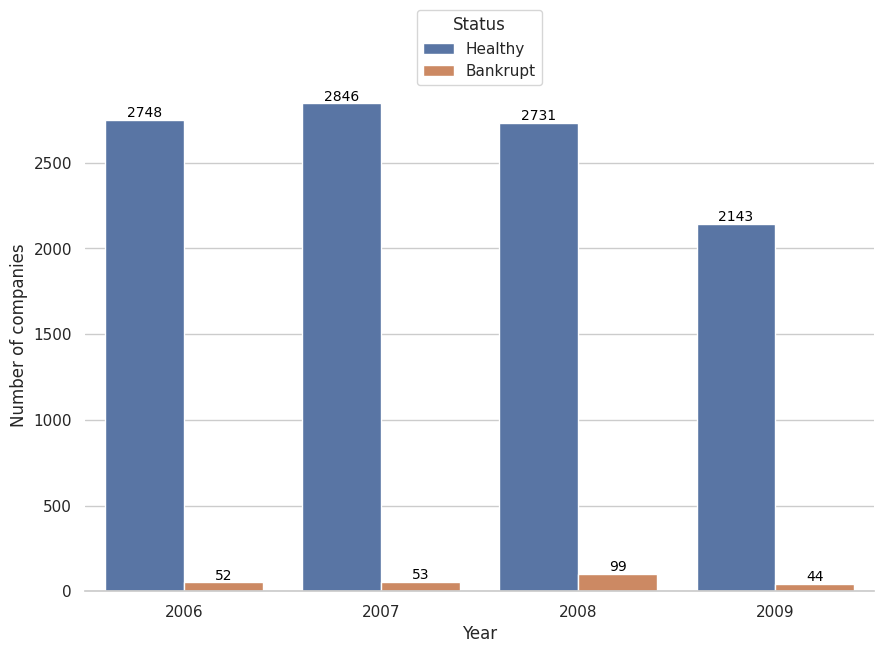

In [3]:
###1
###plot figure 1
# Count the occurrences of each combination of Category1 and Category2
count_data = data.groupby(['ΕΤΟΣ', 'ΕΝΔΕΙΞΗ ΑΣΥΝΕΠΕΙΑΣ (=2) (ν+1)']).size().reset_index(name='ΑΡΙΘΜΟΣ ΕΤΑΙΡΕΙΩΝ')

# Define a mapping from codes to labels
mapping = {1: 'Healthy', 2: 'Βankrupt'}

# Use the map function to replace values in the 'binary_variable' column
count_data['ΕΝΔΕΙΞΗ ΑΣΥΝΕΠΕΙΑΣ (=2) (ν+1)'] = count_data['ΕΝΔΕΙΞΗ ΑΣΥΝΕΠΕΙΑΣ (=2) (ν+1)'].map(mapping)

# Create a grouped bar plot
sns.set(style="whitegrid")
g = sns.catplot(x='ΕΤΟΣ', y='ΑΡΙΘΜΟΣ ΕΤΑΙΡΕΙΩΝ', hue='ΕΝΔΕΙΞΗ ΑΣΥΝΕΠΕΙΑΣ (=2) (ν+1)', data=count_data, kind='bar', legend_out=False, height=6, aspect=1.5)
g.despine(left=True)
#g.set(title='Αριθμός υγιών και χρεωκοπημένων επιχειρήσεων, για κάθε έτος (2006-2009).')
#g.legend.set_title("Status")
plt.legend(title="Status", bbox_to_anchor=(0.5, 1.15), loc='upper center')
g.set_axis_labels("Year", "Number of companies")
# Add text labels above the bars
ax = g.facet_axis(0, 0)  # Get the axis of the first subplot
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2., p.get_height(), f'{p.get_height():.0f}',
            fontsize=10, color='black', ha='center', va='bottom')


#ax.set_title('Bar Chart with Colored Bars for Different Status')
plt.show()




<ipython-input-4-9616a69e737d>:45: UserWarning: FixedFormatter should only be used together with FixedLocator


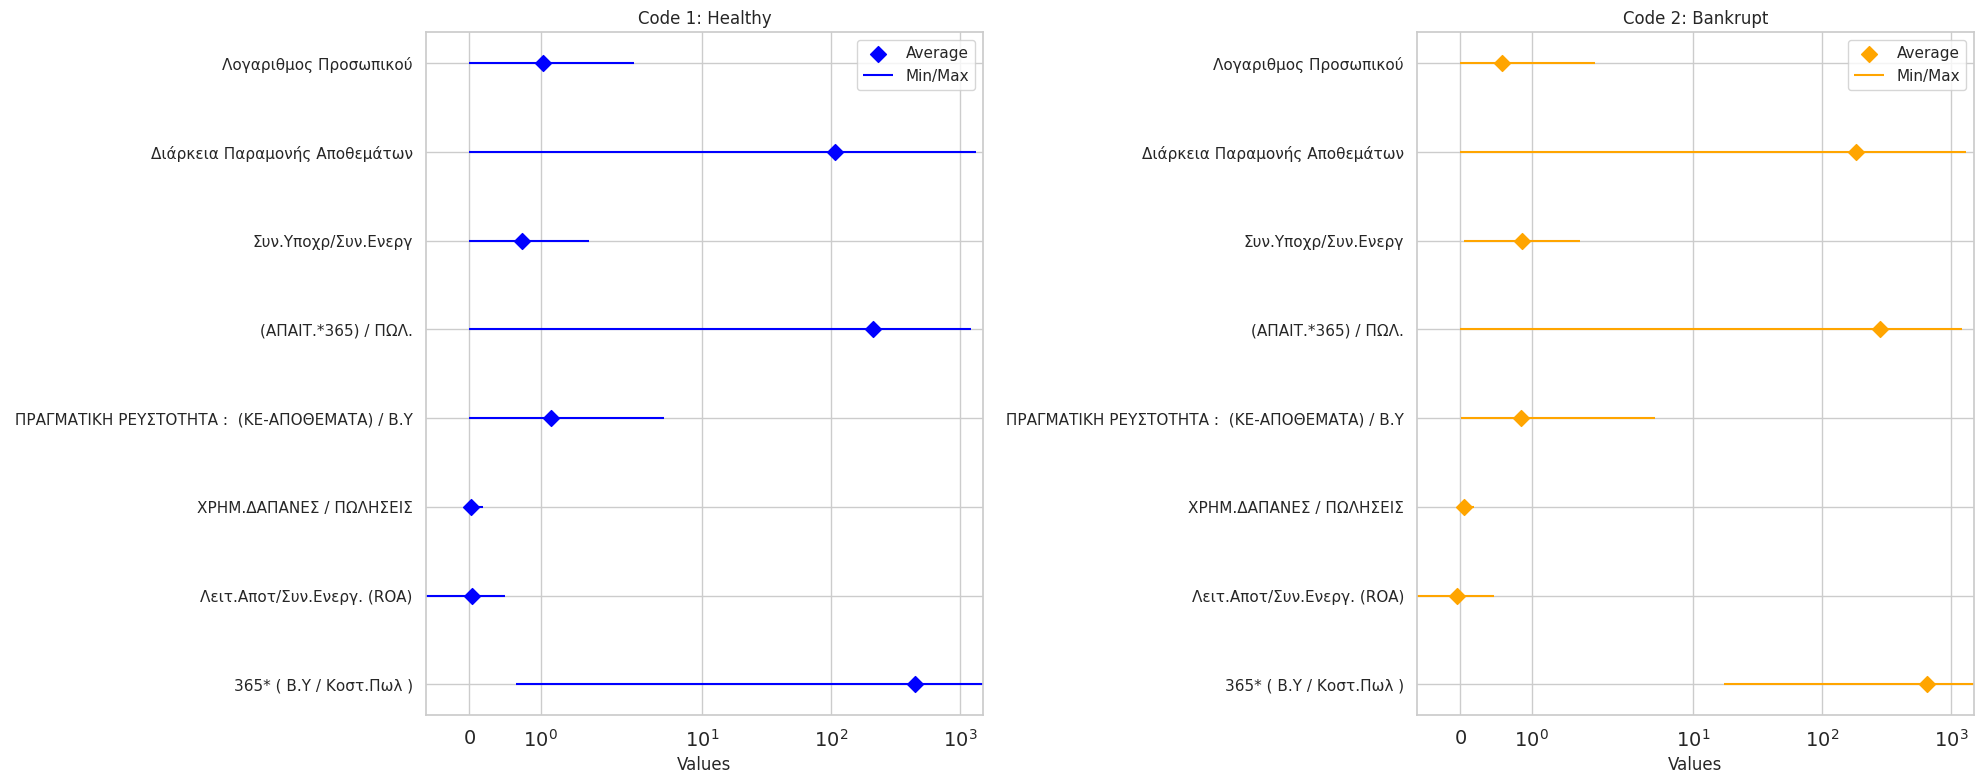

In [4]:
###plot figure 2

# Filter rows with code 1 and 2 and
# Remove the binary variables and the variable with the name 'ΕΤΟΣ'

df_code1 = data[data['ΕΝΔΕΙΞΗ ΑΣΥΝΕΠΕΙΑΣ (=2) (ν+1)'] == 1].drop(columns=['ΕΝΔΕΙΞΗ ΕΞΑΓΩΓΩΝ', 'ΕΝΔΕΙΞΗ ΕΙΣΑΓΩΓΩΝ',
       'ΕΝΔΕΙΞΗ ΑΝΤΙΠΡΟΣΩΠΕΙΩΝ', 'ΕΝΔΕΙΞΗ ΑΣΥΝΕΠΕΙΑΣ (=2) (ν+1)', 'ΕΤΟΣ'])
df_code2 = data[data['ΕΝΔΕΙΞΗ ΑΣΥΝΕΠΕΙΑΣ (=2) (ν+1)'] == 2].drop(columns=['ΕΝΔΕΙΞΗ ΕΞΑΓΩΓΩΝ', 'ΕΝΔΕΙΞΗ ΕΙΣΑΓΩΓΩΝ',
       'ΕΝΔΕΙΞΗ ΑΝΤΙΠΡΟΣΩΠΕΙΩΝ', 'ΕΝΔΕΙΞΗ ΑΣΥΝΕΠΕΙΑΣ (=2) (ν+1)', 'ΕΤΟΣ'])

# Calculate average, min, and max values for each group
avg_code1 = df_code1.mean()
min_code1 = df_code1.min()
max_code1 = df_code1.max()

avg_code2 = df_code2.mean()
min_code2 = df_code2.min()
max_code2 = df_code2.max()


# Create two subplots with log scale on the x-axis and shared x-axis limits
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 8), sharex=True)

# Plot for Code 1
axes[0].scatter(avg_code1, avg_code1.index, color='blue', label='Average', marker='D', s=65)
axes[0].hlines(avg_code1.index, min_code1, max_code1, color='blue', linestyle='-', label='Min/Max')
axes[0].set_xscale('symlog')  # Set symmetrical log scale on the x-axis
axes[0].set_title('Code 1: Healthy')
axes[0].legend()

# Plot for Code 2
axes[1].scatter(avg_code2, avg_code2.index, color='orange', label='Average', marker='D', s=65)
axes[1].hlines(avg_code2.index, min_code2, max_code2, color='orange', linestyle='-', label='Min/Max')
axes[1].set_xscale('symlog')  # Set symmetrical log scale on the x-axis
axes[1].set_title('Code 2: Bankrupt')
axes[1].legend()

# Set common labels and show the plots
for ax in axes:
    ax.set_xlabel('Values')
    ax.tick_params(axis='x', labelsize=14)

    # Adjust the symmetrical log scale limits based on your data
    ax.set_xlim(min([min_code1.min(), min_code2.min()]), max([max_code1.max(), max_code2.max()]))
    ax.set_yticklabels(ax.get_yticklabels(), rotation=0, ha='right')

plt.tight_layout()
warnings.filterwarnings("ignore")

plt.show()




**Data Quality Assurance**

In [5]:
###3

# Check for NaN values
nan_report = data.isna().sum()

# Calculate the percentage of NaN values
nan_percentage_report = (data.isna().mean() * 100).round(2)

# Concatenate the reports side by side
combined_report = pd.concat([nan_report, nan_percentage_report], axis=1, keys=['NaN Count', 'NaN Percentage'])

# Display the combined report
print("Combined NaN Report:")
print(combined_report)

# Provide a relative message to the user
if combined_report.values.max() == 0:
    print("\nGood news! There are no missing values in the DataFrame.")
else:
    print("\nPlease be aware that there are missing values in the DataFrame. Consider handling them appropriately.")

Combined NaN Report:
                                                NaN Count  NaN Percentage
365* ( Β.Υ / Κοστ.Πωλ )                                 0             0.0
Λειτ.Αποτ/Συν.Ενεργ. (ROA)                              0             0.0
ΧΡΗΜ.ΔΑΠΑΝΕΣ / ΠΩΛΗΣΕΙΣ                                 0             0.0
 ΠΡΑΓΜΑΤΙΚΗ ΡΕΥΣΤΟΤΗΤΑ :  (ΚΕ-ΑΠΟΘΕΜΑΤΑ) / Β.Υ          0             0.0
(ΑΠΑΙΤ.*365) / ΠΩΛ.                                     0             0.0
Συν.Υποχρ/Συν.Ενεργ                                     0             0.0
Διάρκεια Παραμονής Αποθεμάτων                           0             0.0
Λογαριθμος Προσωπικού                                   0             0.0
ΕΝΔΕΙΞΗ ΕΞΑΓΩΓΩΝ                                        0             0.0
ΕΝΔΕΙΞΗ ΕΙΣΑΓΩΓΩΝ                                       0             0.0
ΕΝΔΕΙΞΗ ΑΝΤΙΠΡΟΣΩΠΕΙΩΝ                                  0             0.0
ΕΝΔΕΙΞΗ ΑΣΥΝΕΠΕΙΑΣ (=2) (ν+1)                           0             0.0
ΕΤΟΣ             

**Normalize Data to range [0,1]**

In [6]:
###4
#Normalize with MinMaxScaler()
scaler = MinMaxScaler()

#Fit and transform the data to the [0, 1] range
normalized_data = scaler.fit_transform(data.drop(columns=['ΕΤΟΣ']))

#Create a new DataFrame with the normalized data
normalized_df = pd.DataFrame(normalized_data, columns=data.drop(columns=['ΕΤΟΣ']).columns)



**Classification in Unbalanced Train Set**




 Fold 1:
Train - Healthy companies: 7851, Bankrupt companies: 186
Test - Healthy companies: 2617, Bankrupt companies: 62



 
 Model:Linear Discriminant Analysis- Train Set - Accuracy: 0.97 -Precision: 0.14- Recall: 0.09 - F1 : 0.11 - AUC-ROC : 0.54


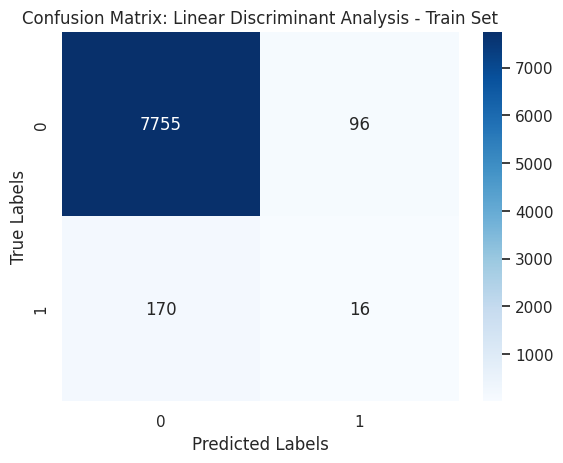


 
 Model:Linear Discriminant Analysis- Test Set - Accuracy: 0.97 - Precision: 0.03 - Recall: 0.02 - F1 : 0.02 - AUC-ROC : 0.5


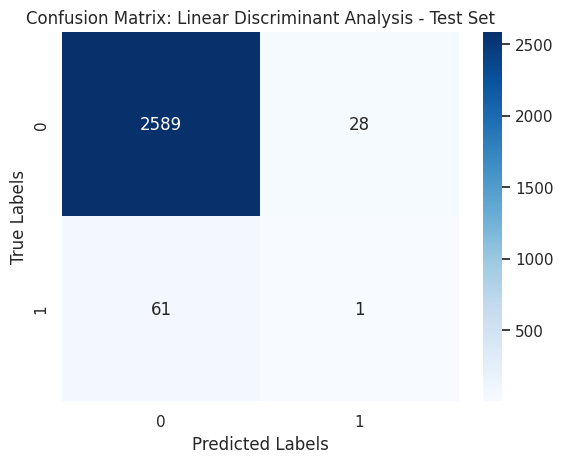


 
 Model:Logistic Regression- Train Set - Accuracy: 0.98 -Precision: 1.0- Recall: 0.01 - F1 : 0.01 - AUC-ROC : 0.5


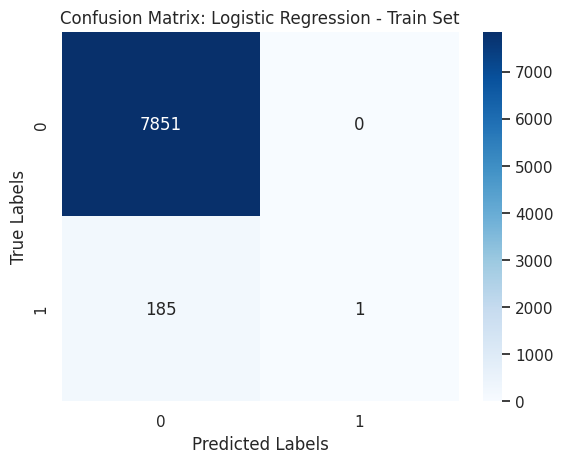


 
 Model:Logistic Regression- Test Set - Accuracy: 0.98 - Precision: 0.0 - Recall: 0.0 - F1 : 0.0 - AUC-ROC : 0.5


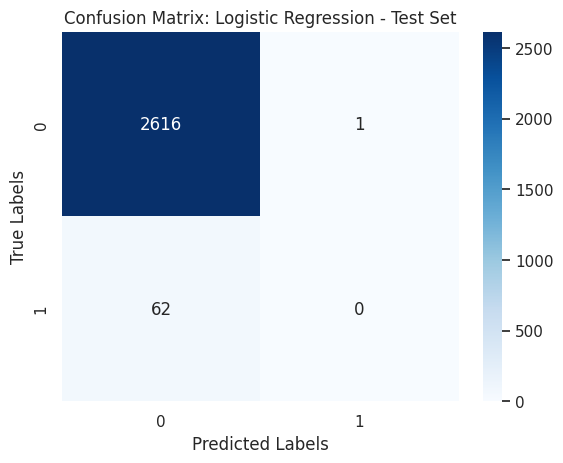


 
 Model:Decision Tree- Train Set - Accuracy: 1.0 -Precision: 1.0- Recall: 1.0 - F1 : 1.0 - AUC-ROC : 1.0


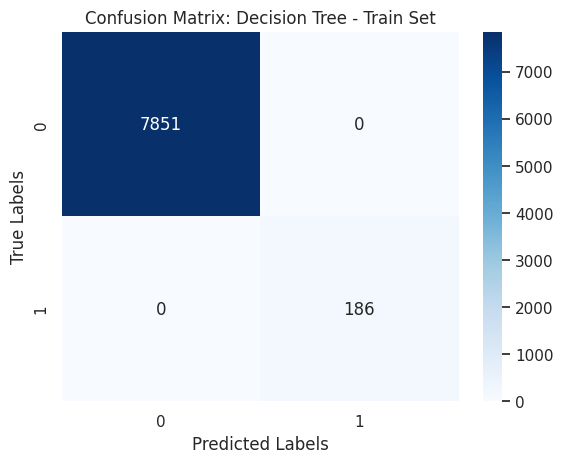


 
 Model:Decision Tree- Test Set - Accuracy: 0.96 - Precision: 0.1 - Recall: 0.1 - F1 : 0.1 - AUC-ROC : 0.54


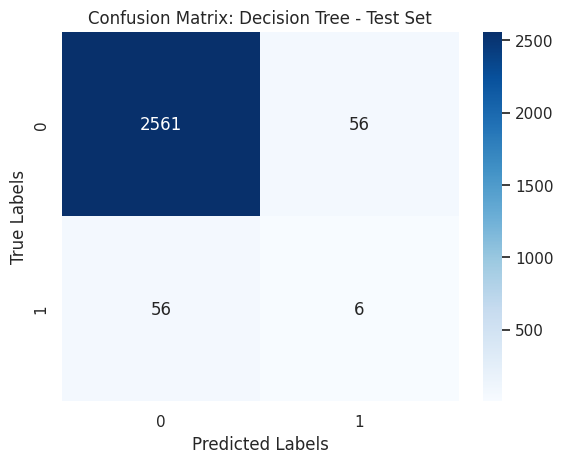


 
 Model:Random Forest- Train Set - Accuracy: 1.0 -Precision: 1.0- Recall: 0.99 - F1 : 1.0 - AUC-ROC : 1.0


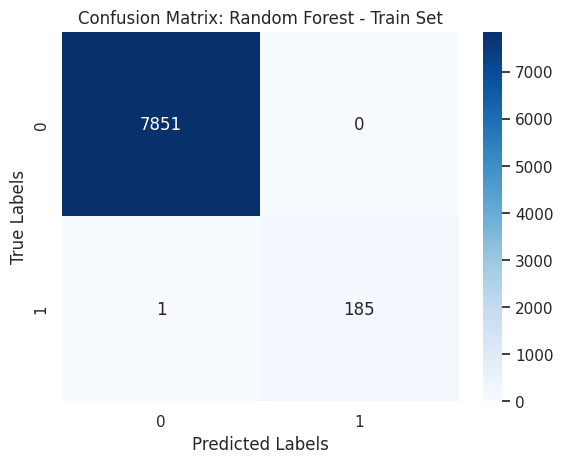


 
 Model:Random Forest- Test Set - Accuracy: 0.98 - Precision: 0.5 - Recall: 0.02 - F1 : 0.03 - AUC-ROC : 0.51


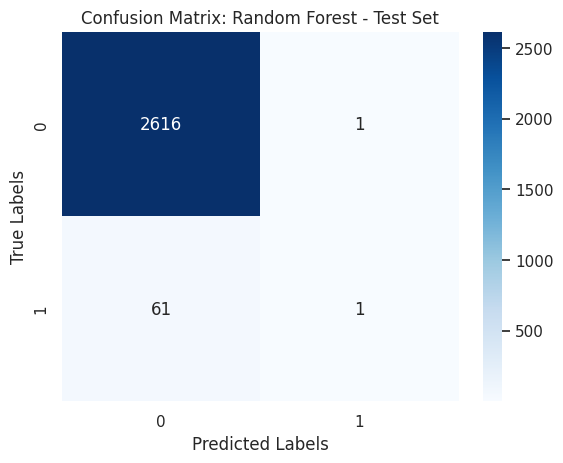


 
 Model:kNN- Train Set - Accuracy: 0.98 -Precision: 0.75- Recall: 0.06 - F1 : 0.12 - AUC-ROC : 0.53


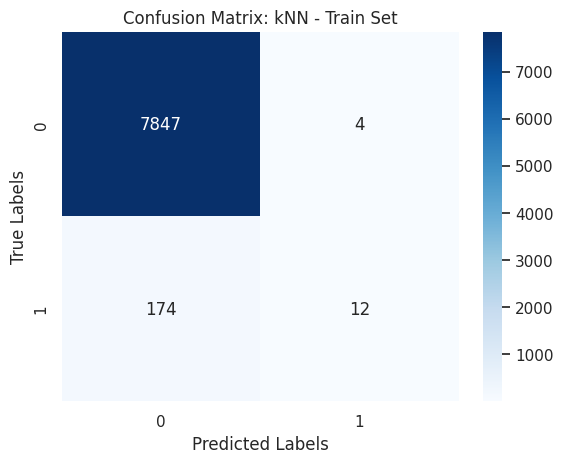


 
 Model:kNN- Test Set - Accuracy: 0.98 - Precision: 0.33 - Recall: 0.03 - F1 : 0.06 - AUC-ROC : 0.52


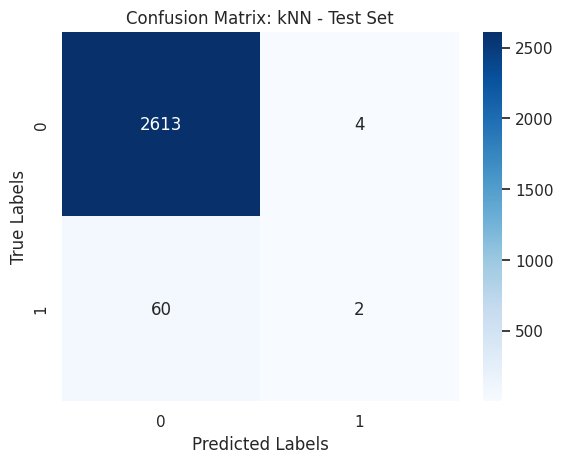


 
 Model:Naive Bayes- Train Set - Accuracy: 0.93 -Precision: 0.09- Recall: 0.23 - F1 : 0.13 - AUC-ROC : 0.59


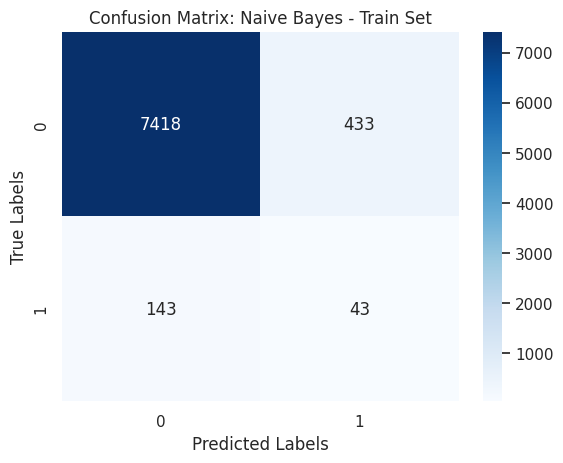


 
 Model:Naive Bayes- Test Set - Accuracy: 0.94 - Precision: 0.09 - Recall: 0.19 - F1 : 0.12 - AUC-ROC : 0.57


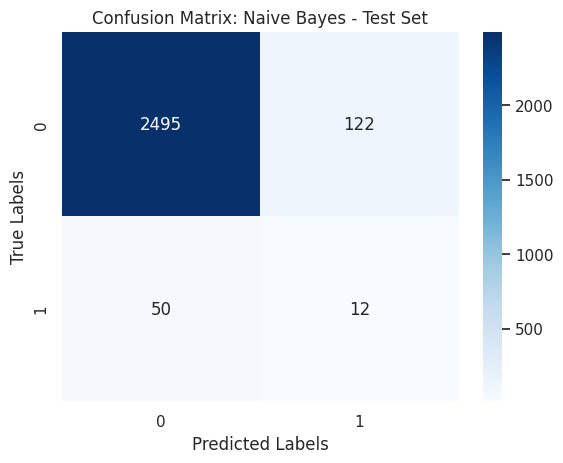


 
 Model:SVM- Train Set - Accuracy: 0.98 -Precision: nan- Recall: 0.0 - F1 : 0.0 - AUC-ROC : 0.5


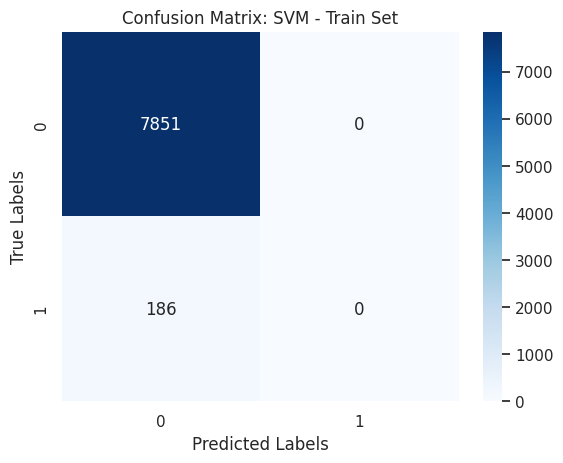


 
 Model:SVM- Test Set - Accuracy: 0.98 - Precision: nan - Recall: 0.0 - F1 : 0.0 - AUC-ROC : 0.5


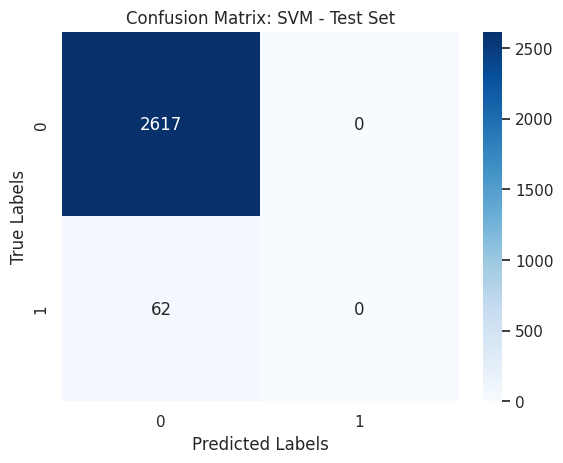


 
 Model:Gradient Boosting Classifier- Train Set - Accuracy: 0.98 -Precision: 0.98- Recall: 0.27 - F1 : 0.42 - AUC-ROC : 0.63


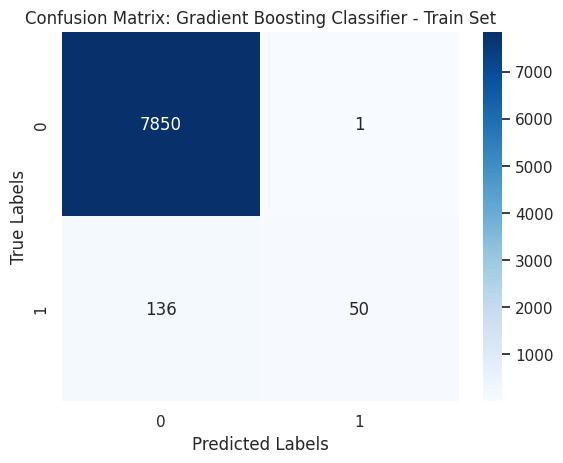


 
 Model:Gradient Boosting Classifier- Test Set - Accuracy: 0.98 - Precision: 0.2 - Recall: 0.02 - F1 : 0.03 - AUC-ROC : 0.51


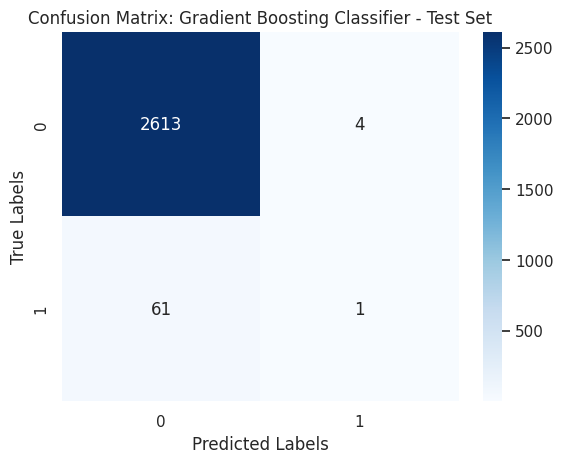


 Fold 2:
Train - Healthy companies: 7851, Bankrupt companies: 186
Test - Healthy companies: 2617, Bankrupt companies: 62



 
 Model:Linear Discriminant Analysis- Train Set - Accuracy: 0.97 -Precision: 0.08- Recall: 0.03 - F1 : 0.04 - AUC-ROC : 0.51


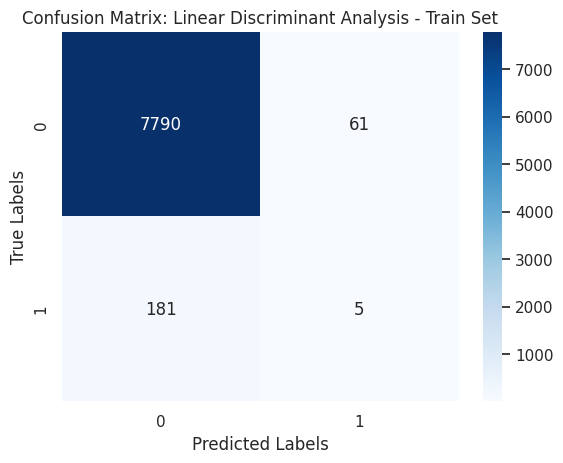


 
 Model:Linear Discriminant Analysis- Test Set - Accuracy: 0.97 - Precision: 0.1 - Recall: 0.05 - F1 : 0.07 - AUC-ROC : 0.52


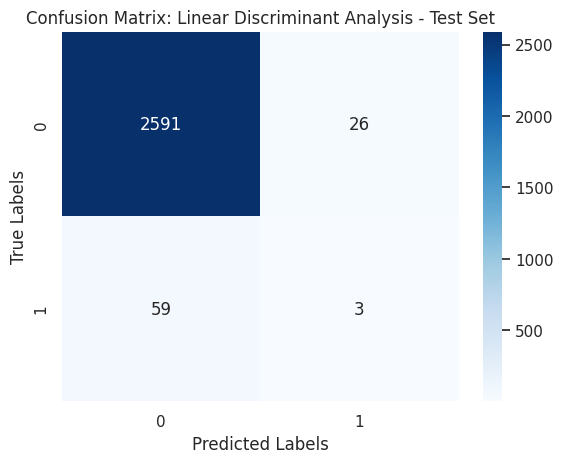


 
 Model:Logistic Regression- Train Set - Accuracy: 0.98 -Precision: nan- Recall: 0.0 - F1 : 0.0 - AUC-ROC : 0.5


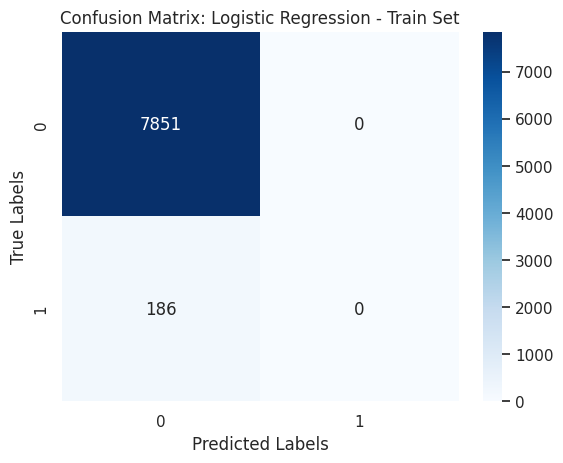


 
 Model:Logistic Regression- Test Set - Accuracy: 0.98 - Precision: nan - Recall: 0.0 - F1 : 0.0 - AUC-ROC : 0.5


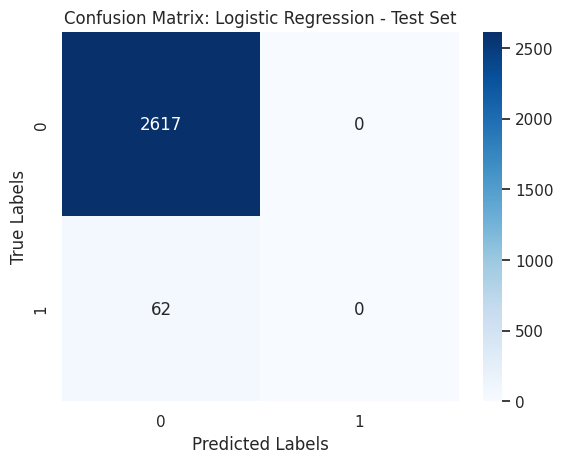


 
 Model:Decision Tree- Train Set - Accuracy: 1.0 -Precision: 1.0- Recall: 1.0 - F1 : 1.0 - AUC-ROC : 1.0


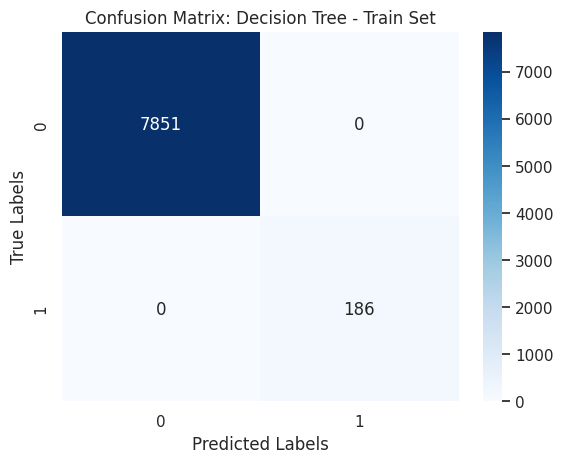


 
 Model:Decision Tree- Test Set - Accuracy: 0.96 - Precision: 0.16 - Recall: 0.16 - F1 : 0.16 - AUC-ROC : 0.57


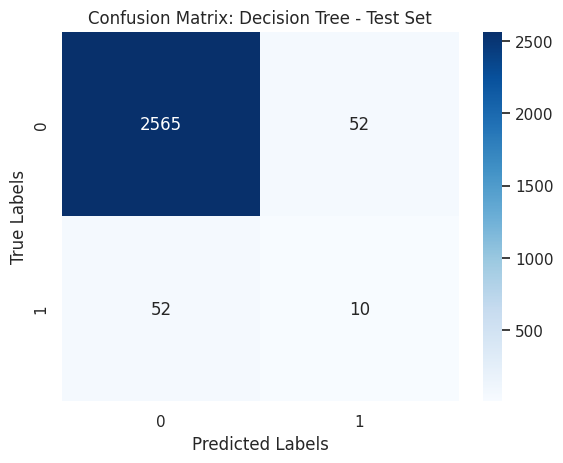


 
 Model:Random Forest- Train Set - Accuracy: 1.0 -Precision: 1.0- Recall: 1.0 - F1 : 1.0 - AUC-ROC : 1.0


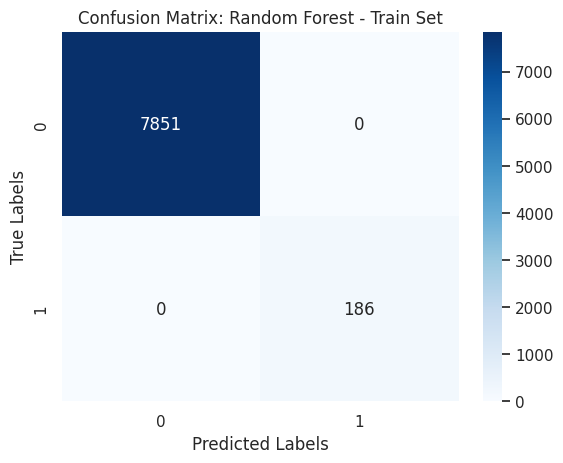


 
 Model:Random Forest- Test Set - Accuracy: 0.98 - Precision: 0.0 - Recall: 0.0 - F1 : 0.0 - AUC-ROC : 0.5


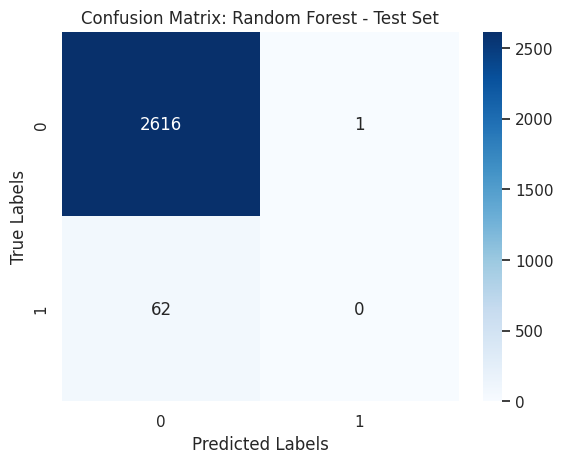


 
 Model:kNN- Train Set - Accuracy: 0.98 -Precision: 0.85- Recall: 0.12 - F1 : 0.21 - AUC-ROC : 0.56


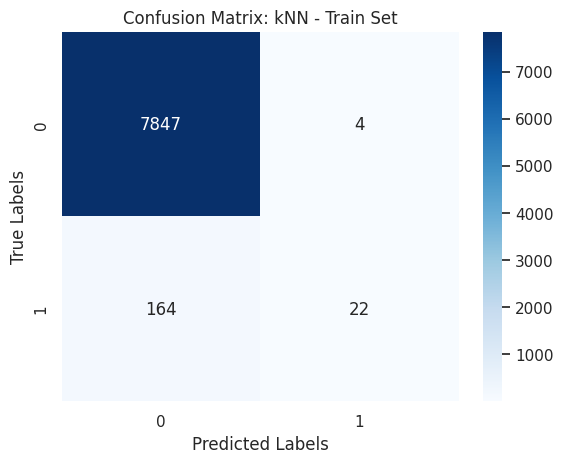


 
 Model:kNN- Test Set - Accuracy: 0.98 - Precision: 0.43 - Recall: 0.05 - F1 : 0.09 - AUC-ROC : 0.52


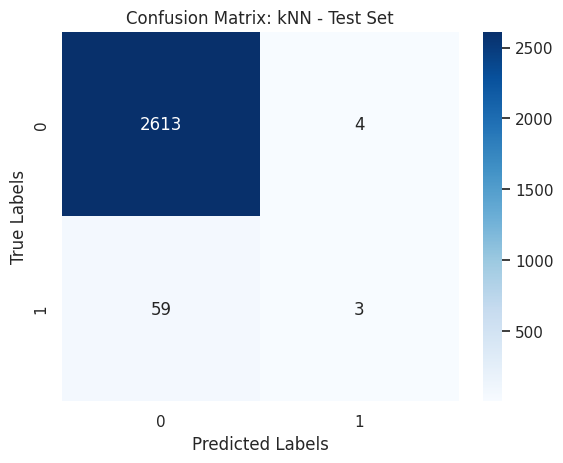


 
 Model:Naive Bayes- Train Set - Accuracy: 0.93 -Precision: 0.09- Recall: 0.25 - F1 : 0.14 - AUC-ROC : 0.6


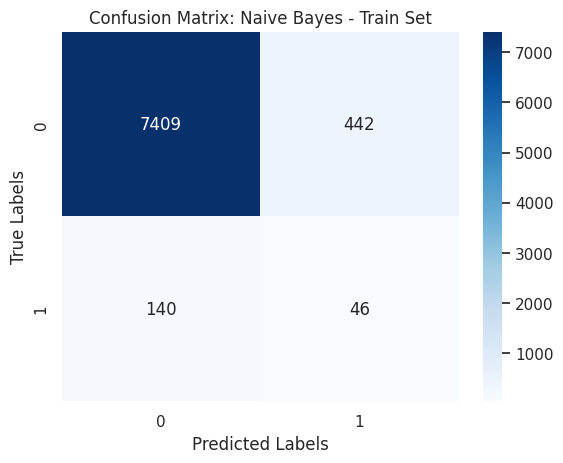


 
 Model:Naive Bayes- Test Set - Accuracy: 0.93 - Precision: 0.1 - Recall: 0.26 - F1 : 0.15 - AUC-ROC : 0.6


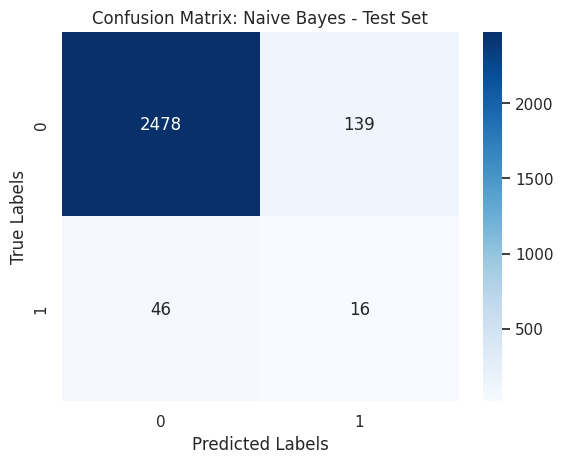


 
 Model:SVM- Train Set - Accuracy: 0.98 -Precision: nan- Recall: 0.0 - F1 : 0.0 - AUC-ROC : 0.5


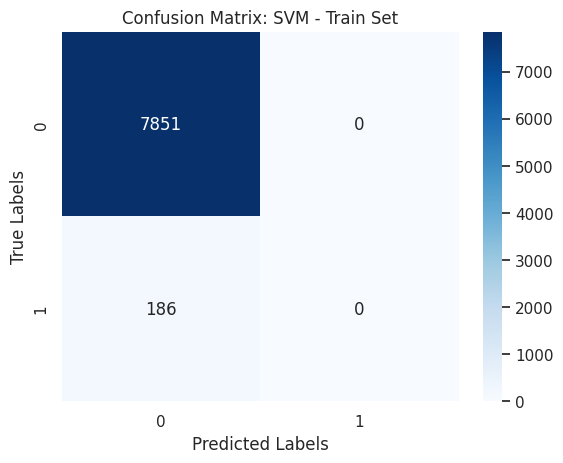


 
 Model:SVM- Test Set - Accuracy: 0.98 - Precision: nan - Recall: 0.0 - F1 : 0.0 - AUC-ROC : 0.5


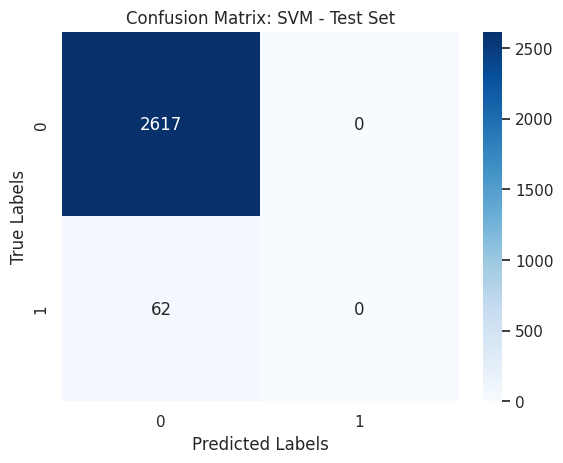


 
 Model:Gradient Boosting Classifier- Train Set - Accuracy: 0.98 -Precision: 1.0- Recall: 0.31 - F1 : 0.47 - AUC-ROC : 0.65


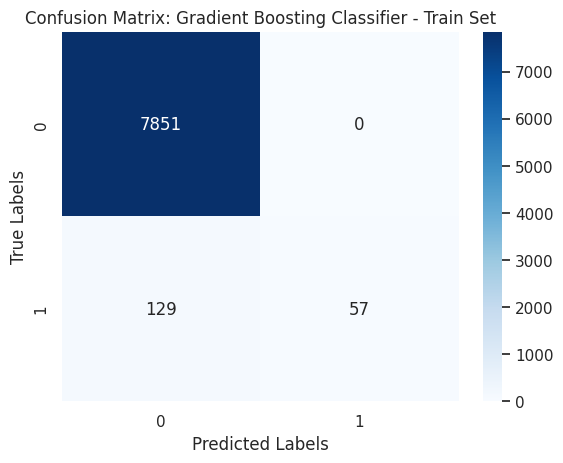


 
 Model:Gradient Boosting Classifier- Test Set - Accuracy: 0.98 - Precision: 0.5 - Recall: 0.06 - F1 : 0.11 - AUC-ROC : 0.53


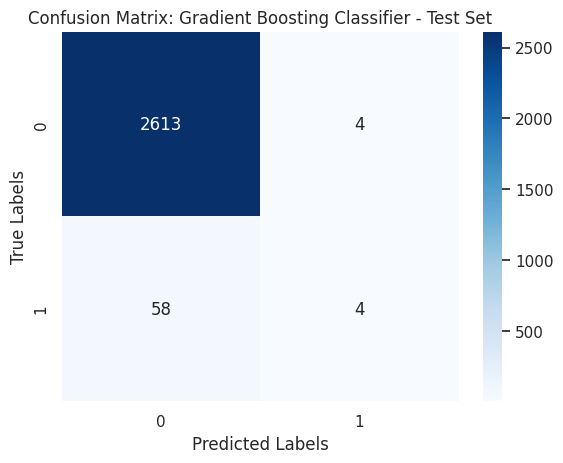


 Fold 3:
Train - Healthy companies: 7851, Bankrupt companies: 186
Test - Healthy companies: 2617, Bankrupt companies: 62



 
 Model:Linear Discriminant Analysis- Train Set - Accuracy: 0.97 -Precision: 0.15- Recall: 0.08 - F1 : 0.1 - AUC-ROC : 0.53


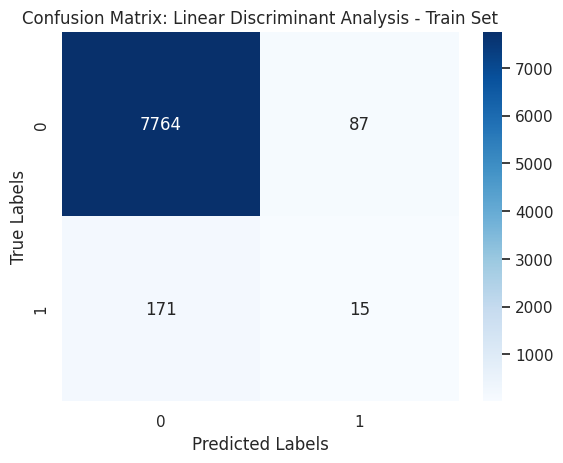


 
 Model:Linear Discriminant Analysis- Test Set - Accuracy: 0.96 - Precision: 0.07 - Recall: 0.05 - F1 : 0.06 - AUC-ROC : 0.52


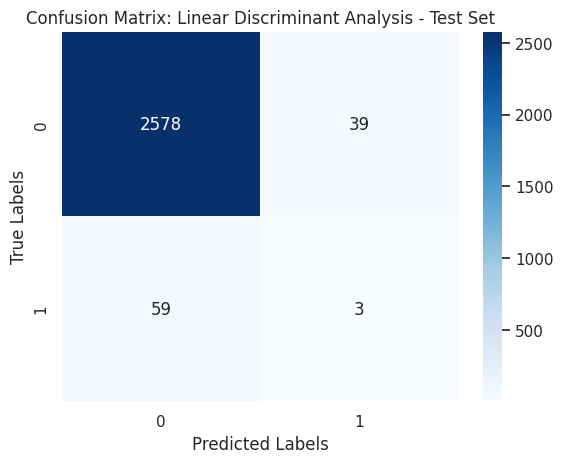


 
 Model:Logistic Regression- Train Set - Accuracy: 0.98 -Precision: 0.2- Recall: 0.01 - F1 : 0.01 - AUC-ROC : 0.5


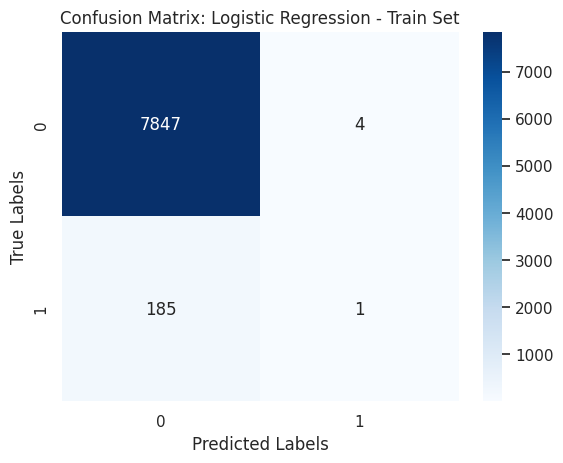


 
 Model:Logistic Regression- Test Set - Accuracy: 0.98 - Precision: 0.0 - Recall: 0.0 - F1 : 0.0 - AUC-ROC : 0.5


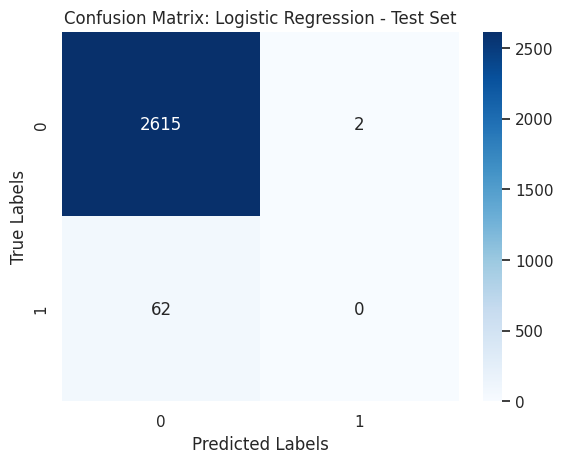


 
 Model:Decision Tree- Train Set - Accuracy: 1.0 -Precision: 1.0- Recall: 1.0 - F1 : 1.0 - AUC-ROC : 1.0


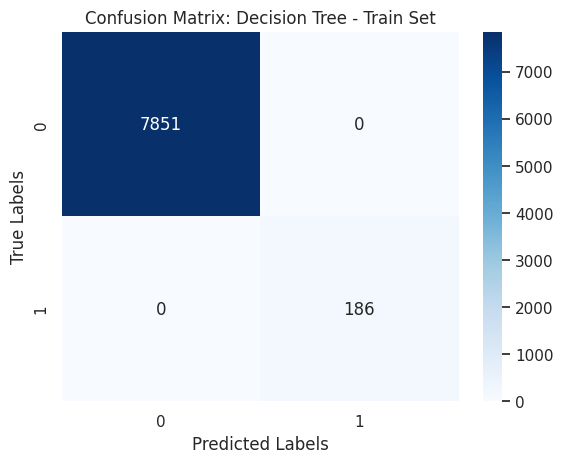


 
 Model:Decision Tree- Test Set - Accuracy: 0.96 - Precision: 0.13 - Recall: 0.15 - F1 : 0.14 - AUC-ROC : 0.56


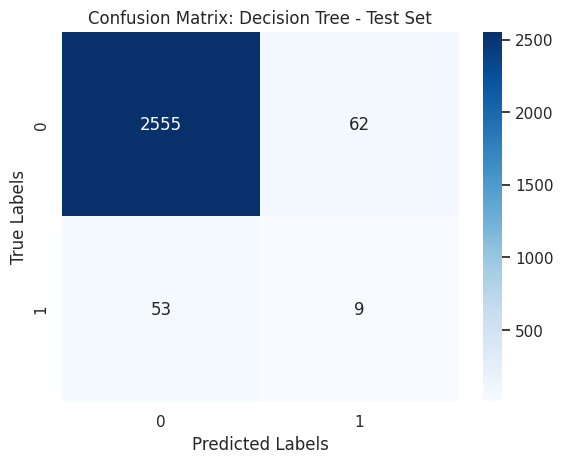


 
 Model:Random Forest- Train Set - Accuracy: 1.0 -Precision: 1.0- Recall: 1.0 - F1 : 1.0 - AUC-ROC : 1.0


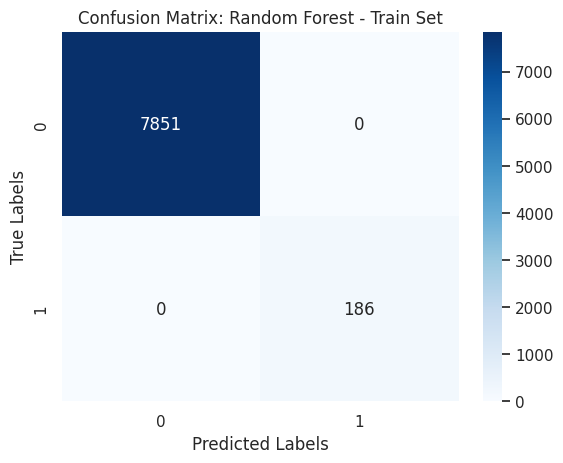


 
 Model:Random Forest- Test Set - Accuracy: 0.98 - Precision: 1.0 - Recall: 0.02 - F1 : 0.03 - AUC-ROC : 0.51


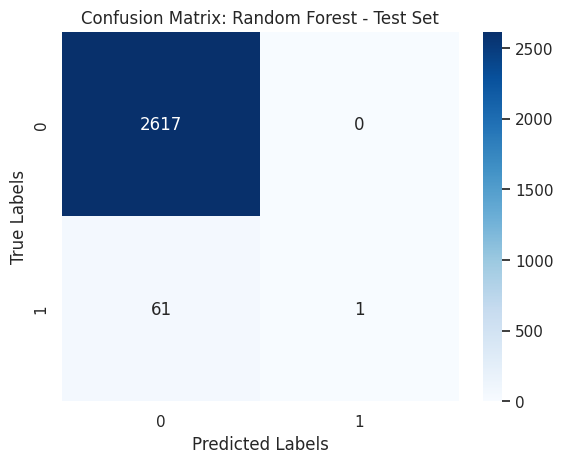


 
 Model:kNN- Train Set - Accuracy: 0.98 -Precision: 0.79- Recall: 0.12 - F1 : 0.21 - AUC-ROC : 0.56


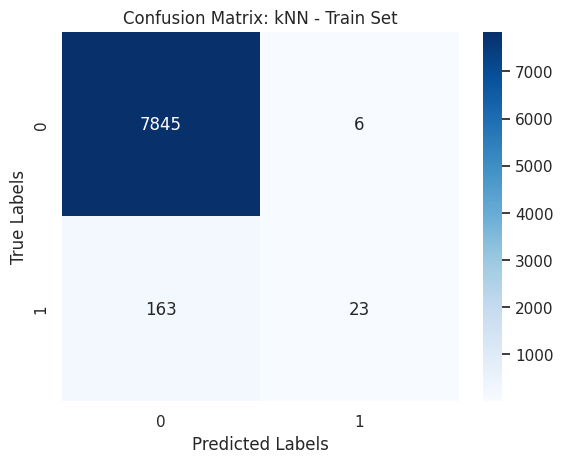


 
 Model:kNN- Test Set - Accuracy: 0.97 - Precision: 0.1 - Recall: 0.02 - F1 : 0.03 - AUC-ROC : 0.51


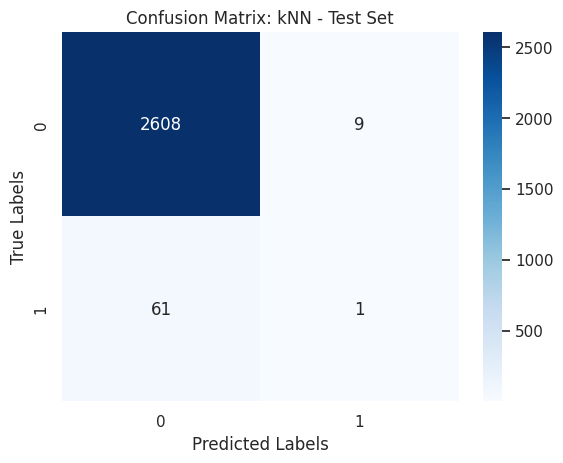


 
 Model:Naive Bayes- Train Set - Accuracy: 0.93 -Precision: 0.1- Recall: 0.26 - F1 : 0.14 - AUC-ROC : 0.6


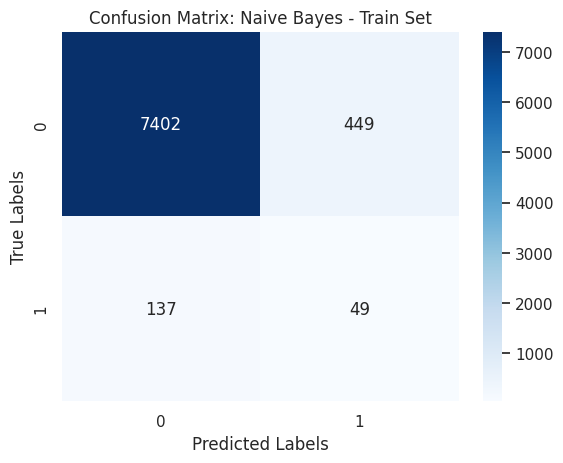


 
 Model:Naive Bayes- Test Set - Accuracy: 0.92 - Precision: 0.07 - Recall: 0.23 - F1 : 0.11 - AUC-ROC : 0.58


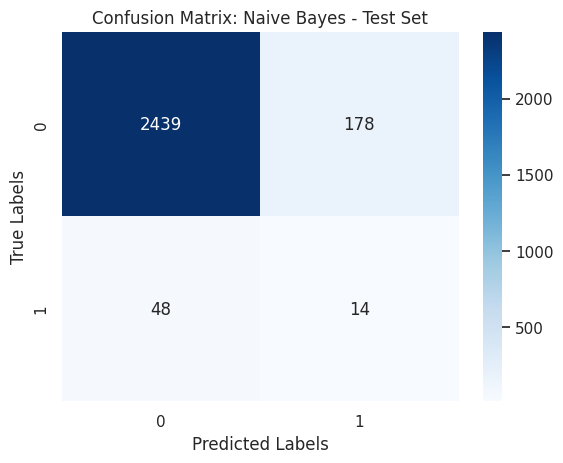


 
 Model:SVM- Train Set - Accuracy: 0.98 -Precision: nan- Recall: 0.0 - F1 : 0.0 - AUC-ROC : 0.5


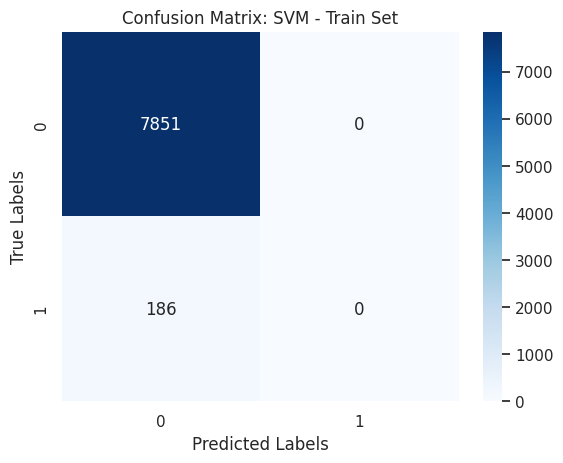


 
 Model:SVM- Test Set - Accuracy: 0.98 - Precision: nan - Recall: 0.0 - F1 : 0.0 - AUC-ROC : 0.5


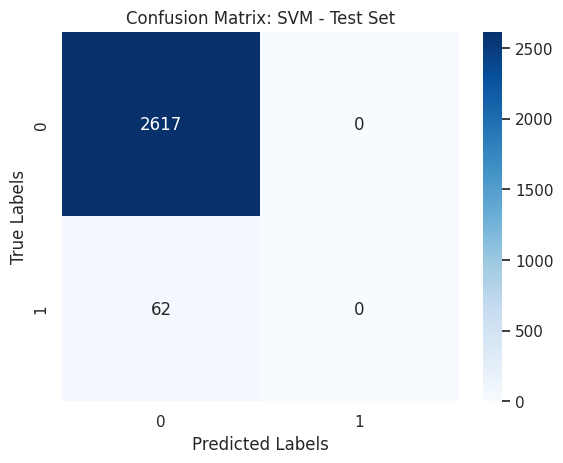


 
 Model:Gradient Boosting Classifier- Train Set - Accuracy: 0.98 -Precision: 1.0- Recall: 0.29 - F1 : 0.45 - AUC-ROC : 0.65


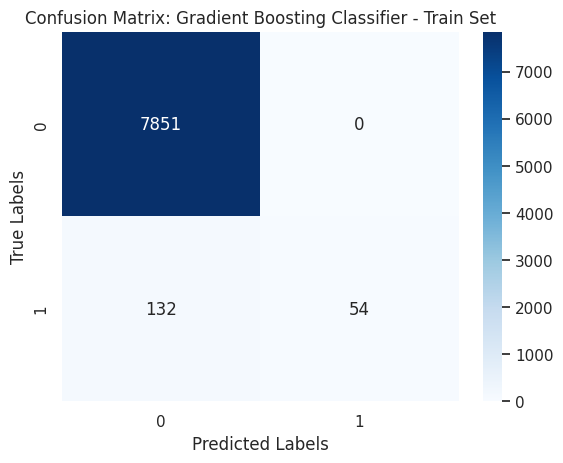


 
 Model:Gradient Boosting Classifier- Test Set - Accuracy: 0.97 - Precision: 0.25 - Recall: 0.05 - F1 : 0.08 - AUC-ROC : 0.52


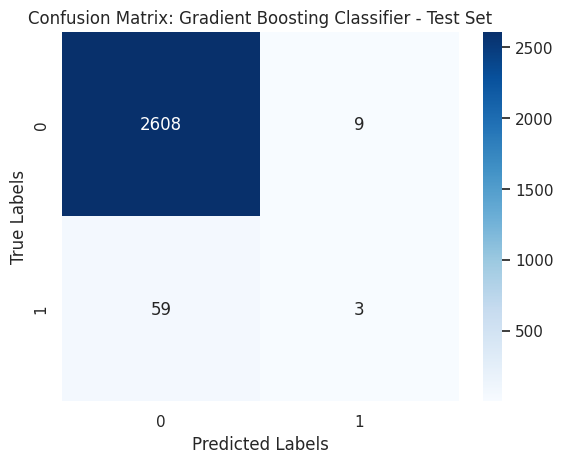


 Fold 4:
Train - Healthy companies: 7851, Bankrupt companies: 186
Test - Healthy companies: 2617, Bankrupt companies: 62



 
 Model:Linear Discriminant Analysis- Train Set - Accuracy: 0.97 -Precision: 0.09- Recall: 0.04 - F1 : 0.06 - AUC-ROC : 0.52


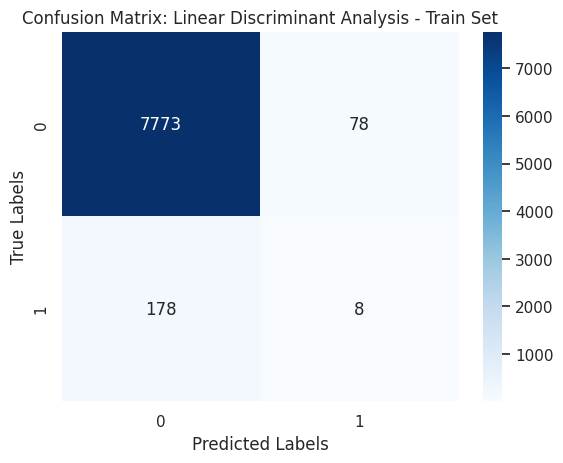


 
 Model:Linear Discriminant Analysis- Test Set - Accuracy: 0.97 - Precision: 0.25 - Recall: 0.06 - F1 : 0.1 - AUC-ROC : 0.53


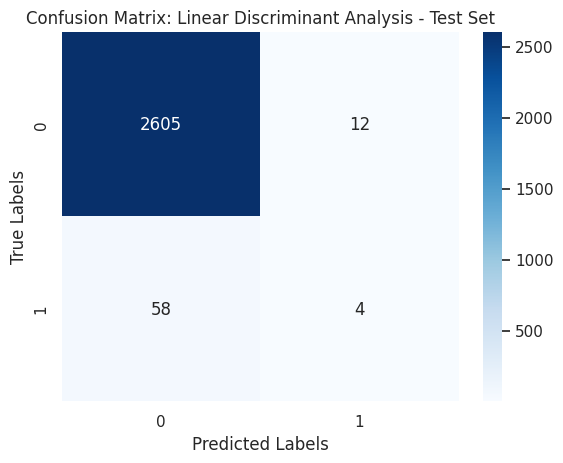


 
 Model:Logistic Regression- Train Set - Accuracy: 0.98 -Precision: 1.0- Recall: 0.01 - F1 : 0.01 - AUC-ROC : 0.5


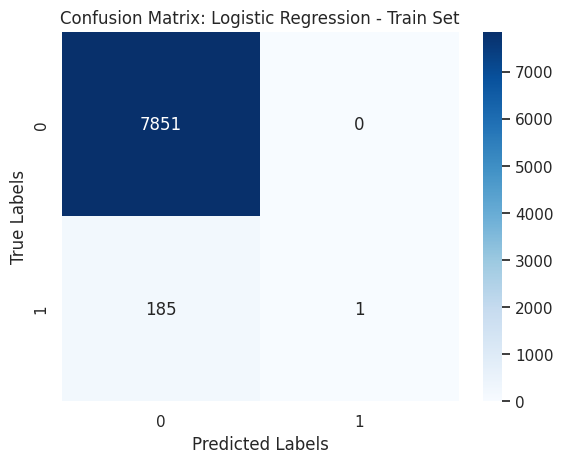


 
 Model:Logistic Regression- Test Set - Accuracy: 0.98 - Precision: nan - Recall: 0.0 - F1 : 0.0 - AUC-ROC : 0.5


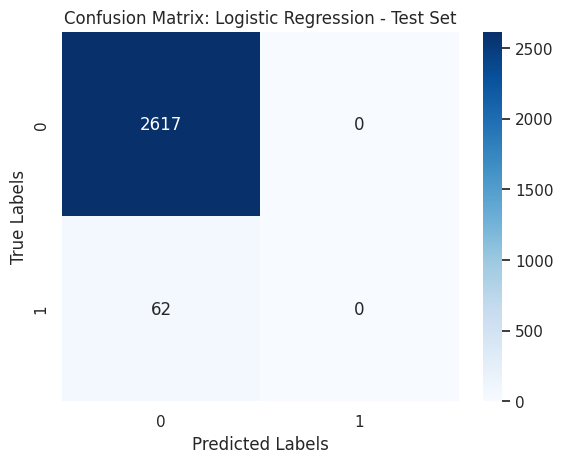


 
 Model:Decision Tree- Train Set - Accuracy: 1.0 -Precision: 1.0- Recall: 1.0 - F1 : 1.0 - AUC-ROC : 1.0


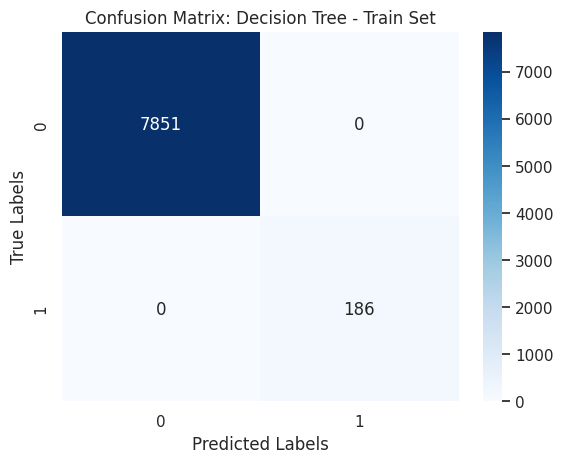


 
 Model:Decision Tree- Test Set - Accuracy: 0.96 - Precision: 0.09 - Recall: 0.08 - F1 : 0.09 - AUC-ROC : 0.53


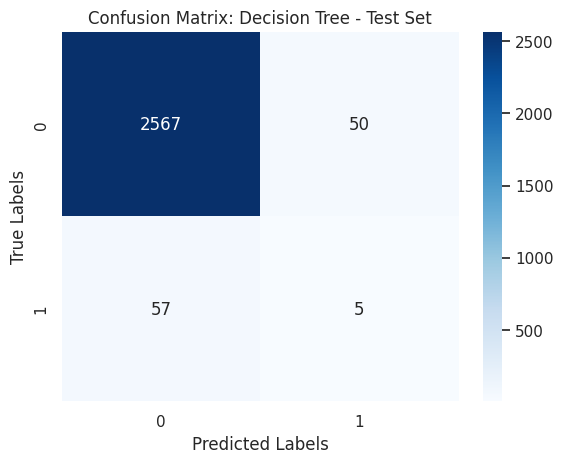


 
 Model:Random Forest- Train Set - Accuracy: 1.0 -Precision: 1.0- Recall: 1.0 - F1 : 1.0 - AUC-ROC : 1.0


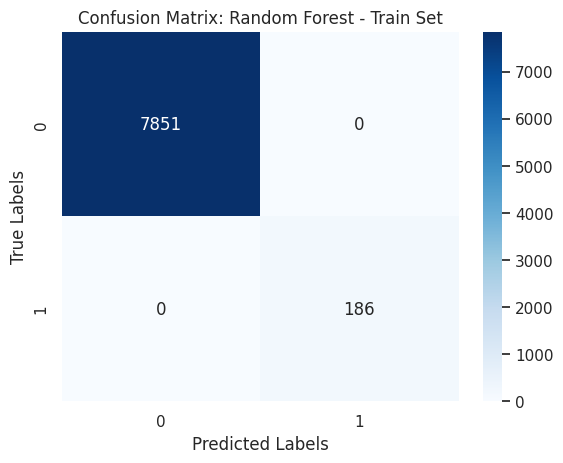


 
 Model:Random Forest- Test Set - Accuracy: 0.98 - Precision: 1.0 - Recall: 0.02 - F1 : 0.03 - AUC-ROC : 0.51


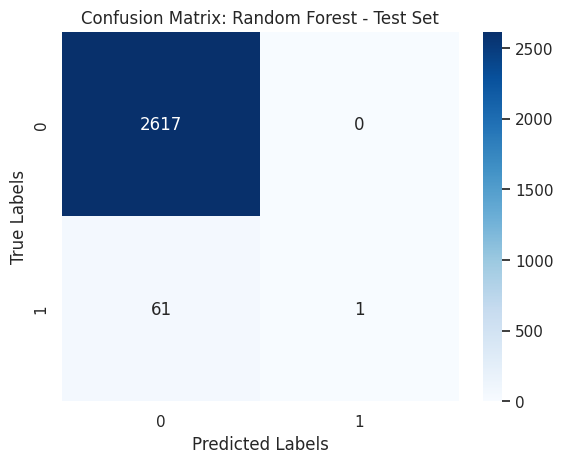


 
 Model:kNN- Train Set - Accuracy: 0.98 -Precision: 0.68- Recall: 0.1 - F1 : 0.18 - AUC-ROC : 0.55


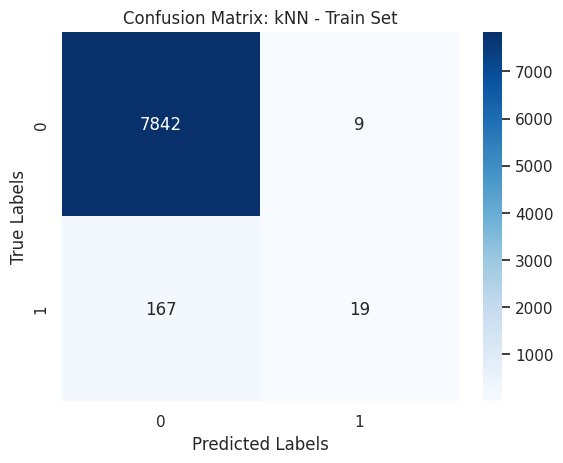


 
 Model:kNN- Test Set - Accuracy: 0.98 - Precision: 0.71 - Recall: 0.08 - F1 : 0.14 - AUC-ROC : 0.54


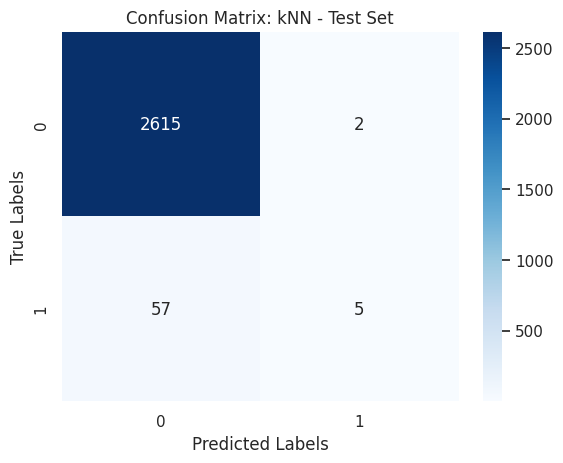


 
 Model:Naive Bayes- Train Set - Accuracy: 0.93 -Precision: 0.09- Recall: 0.25 - F1 : 0.14 - AUC-ROC : 0.6


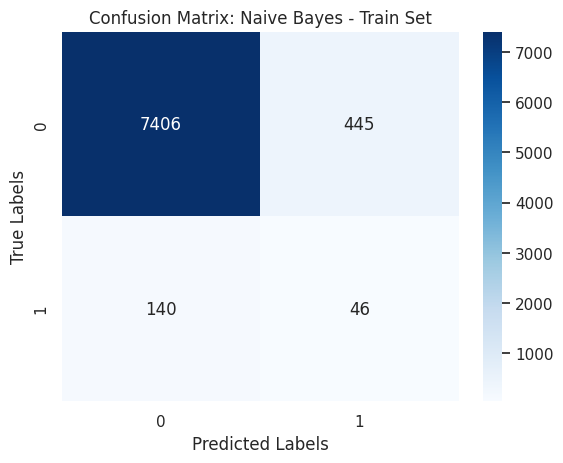


 
 Model:Naive Bayes- Test Set - Accuracy: 0.93 - Precision: 0.09 - Recall: 0.23 - F1 : 0.12 - AUC-ROC : 0.58


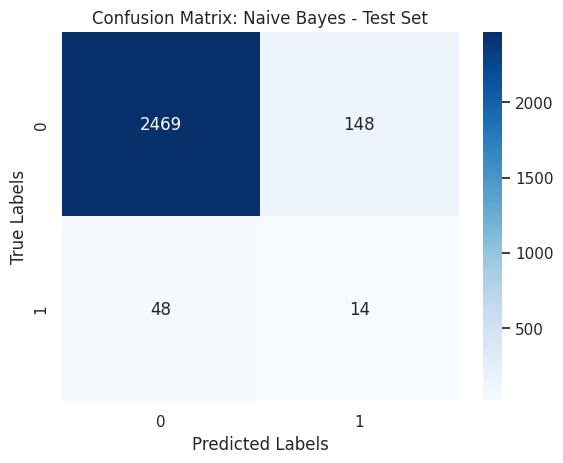


 
 Model:SVM- Train Set - Accuracy: 0.98 -Precision: nan- Recall: 0.0 - F1 : 0.0 - AUC-ROC : 0.5


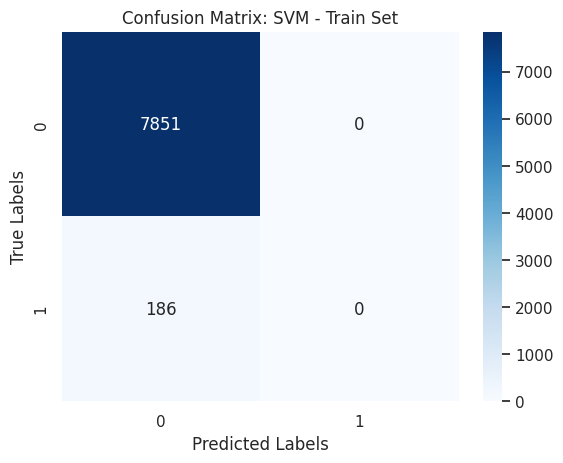


 
 Model:SVM- Test Set - Accuracy: 0.98 - Precision: nan - Recall: 0.0 - F1 : 0.0 - AUC-ROC : 0.5


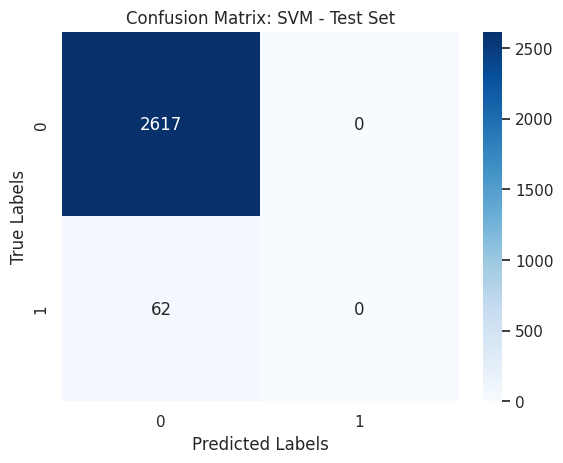


 
 Model:Gradient Boosting Classifier- Train Set - Accuracy: 0.98 -Precision: 1.0- Recall: 0.27 - F1 : 0.42 - AUC-ROC : 0.63


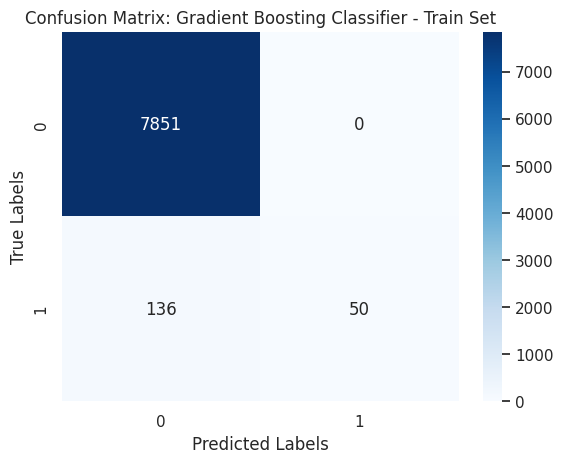


 
 Model:Gradient Boosting Classifier- Test Set - Accuracy: 0.98 - Precision: 0.4 - Recall: 0.03 - F1 : 0.06 - AUC-ROC : 0.52


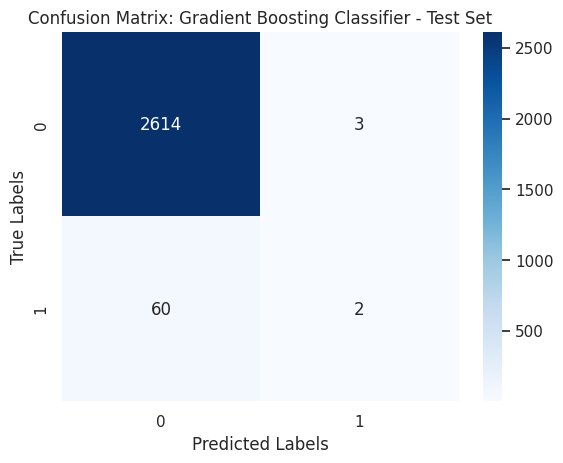

In [7]:
###5
#Implementation of models

from sklearn.model_selection import StratifiedKFold
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier #personal choice
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import classification_report



#Using StratifiesKFold()
skf4 = StratifiedKFold(n_splits=4, shuffle=True , random_state=42)

#Create train and test dataset
X=normalized_df.drop("ΕΝΔΕΙΞΗ ΑΣΥΝΕΠΕΙΑΣ (=2) (ν+1)" , axis=1)
y=normalized_df["ΕΝΔΕΙΞΗ ΑΣΥΝΕΠΕΙΑΣ (=2) (ν+1)"]

#Initialization of models
models = {'Linear Discriminant Analysis' : LinearDiscriminantAnalysis()  , 'Logistic Regression' : LogisticRegression() , 'Decision Tree':tree.DecisionTreeClassifier(), 'Random Forest':RandomForestClassifier(), 'kNN':KNeighborsClassifier(), 'Naive Bayes' : GaussianNB(), 'SVM':SVC(probability = True), 'Gradient Boosting Classifier': GradientBoostingClassifier(random_state=42) }
columns= ["Fold", "Classifier Name" , "Training or Test Set" , "Balanced or UnBalanced Train Set" , "Number of Training Samples" , "Number of non-healthy in training sample", "TP", "TN", "FP", "FN" , "ROC-AUC"]
results = pd.DataFrame(columns = columns)
results1 = pd.DataFrame(columns = columns)
results2 = pd.DataFrame(columns = columns)


for fold, (train_index, test_index) in enumerate (skf4.split(X,y),1):
  X_train, X_test = X.iloc[train_index], X.iloc[test_index]
  y_train, y_test = y.iloc[train_index], y.iloc[test_index]
  print(f"\n Fold {fold}:")
  print(f"Train - Healthy companies: {y_train[y_train==0].count()}, Bankrupt companies: {y_train[y_train==1].count()}")
  print(f"Test - Healthy companies: {y_test[y_test==0].count()}, Bankrupt companies: {y_test[y_test==1].count()}")
  print("\n")
  for model_name,model in models.items():
    model.fit(X_train , y_train)

    #Train predictions, confusion matrix , scores
    train_predictions = model.predict(X_train)
    train_cm = confusion_matrix(y_train , train_predictions)
    train_tp, train_tn, train_fp, train_fn = train_cm[1, 1], train_cm[0, 0], train_cm[0, 1], train_cm[1, 0]
    train_accuracy = (train_tp + train_tn) / (train_tp + train_tn + train_fp + train_fn)
    train_precision = (train_tp)/(train_tp + train_fp)
    train_recall = train_tp / (train_tp + train_fn)
    train_f1 = (2*train_tp) / (2*train_tp + train_fp + train_fn)
    train_roc_auc = roc_auc_score(y_train, train_predictions)
    print(f"\n \n Model:{model_name}- Train Set - Accuracy: {round(train_accuracy,2)} -Precision: {round(train_precision,2)}- Recall: {round(train_recall,2)} - F1 : {round(train_f1,2)} - AUC-ROC : {round(train_roc_auc,2)}")
    sns.heatmap(train_cm, annot=True, fmt="d", cmap="Blues")
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.title(f"Confusion Matrix: {model_name} - Train Set")
    plt.show()
    result = [fold, model_name , "Train Set" , "Unbalanced Set" , len(y_train), y_train[y_train==1].count(), train_tp, train_tn, train_fp, train_fn, train_roc_auc]
    results = results.append(pd.Series(result, index=results.columns), ignore_index=True)


    #Test prediction, confusion matrix, scores
    test_predictions = model.predict(X_test)
    test_cm = confusion_matrix(y_test , test_predictions)
    test_accuracy = accuracy_score(y_test, test_predictions)
    test_tp, test_tn, test_fp, test_fn = test_cm[1, 1], test_cm[0, 0],  test_cm[0, 1], test_cm[1, 0]
    test_accuracy = (test_tp + test_tn) / (test_tp + test_tn + test_fp + test_fn)
    test_precision = (test_tp)/(test_tp + test_fp)
    test_recall = test_tp / (test_tp + test_fn)
    test_f1 = (2*test_tp) / (2*test_tp + test_fp + test_fn)
    test_roc_auc = roc_auc_score(y_test, test_predictions)
    print(f"\n \n Model:{model_name}- Test Set - Accuracy: {round(test_accuracy,2)} - Precision: {round(test_precision,2)} - Recall: {round(test_recall,2)} - F1 : {round(test_f1,2)} - AUC-ROC : {round(test_roc_auc,2)}")
    sns.heatmap(test_cm, annot=True, fmt="d", cmap="Blues")
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.title(f"Confusion Matrix: {model_name} - Test Set")
    plt.show()
    result = [fold, model_name , "Test Set" , "Unbalanced Set" , len(y_test), y_test[y_test==1].count(), test_tp, test_tn, test_fp, test_fn, test_roc_auc]
    results = results.append(pd.Series(result, index=results.columns), ignore_index=True)


results1 = results









****Classification in Balanced Set****



 Fold 1:
Train - Healthy companies: 558, Bankrupt companies: 186
Test - Healthy companies: 3175, Bankrupt companies: 62



 
 Model:Linear Discriminant Analysis- Train Set - Accuracy: 0.81 -Precision: 0.69 - Recall: 0.42 - F1 : 0.53 - AUC-ROC : 0.68


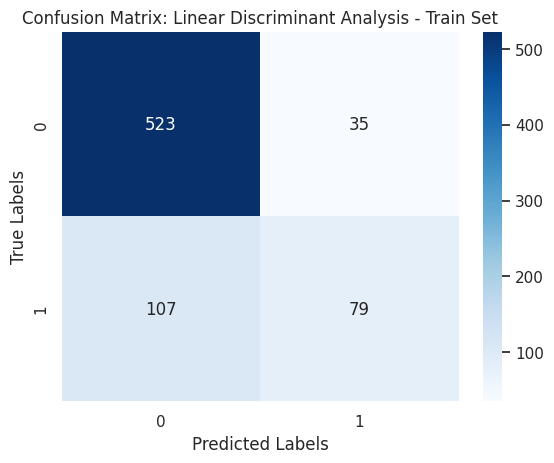


 
  Model:Linear Discriminant Analysis- Test Set - Accuracy: 0.91 -Precision 0.11 - Recall: 0.5 - F1 : 0.18 - AUC-ROC : 0.71


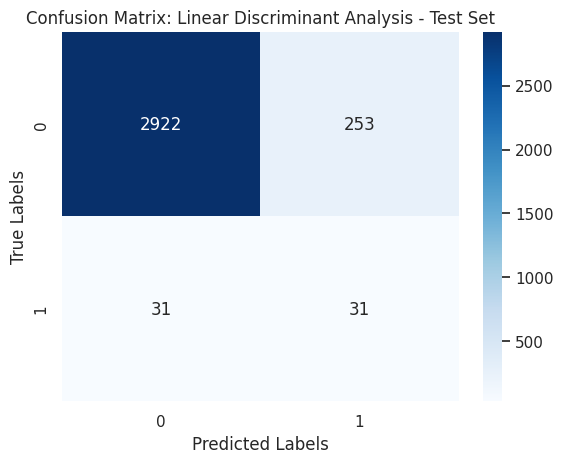


 
 Model:Logistic Regression- Train Set - Accuracy: 0.8 -Precision: 0.68 - Recall: 0.37 - F1 : 0.48 - AUC-ROC : 0.66


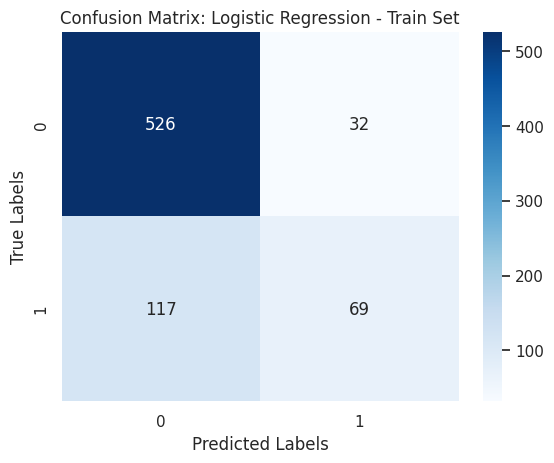


 
  Model:Logistic Regression- Test Set - Accuracy: 0.92 -Precision 0.12 - Recall: 0.48 - F1 : 0.19 - AUC-ROC : 0.71


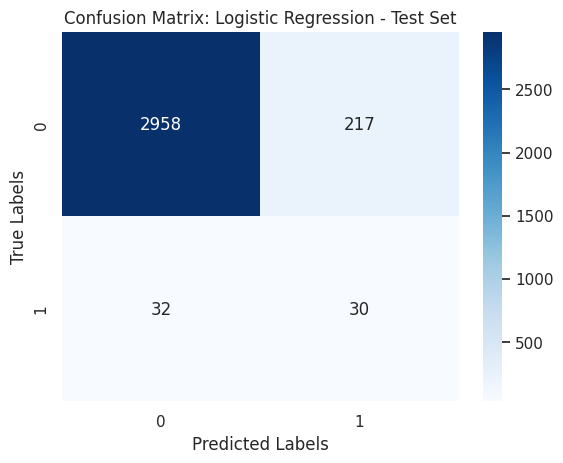


 
 Model:Decision Tree- Train Set - Accuracy: 1.0 -Precision: 1.0 - Recall: 1.0 - F1 : 1.0 - AUC-ROC : 1.0


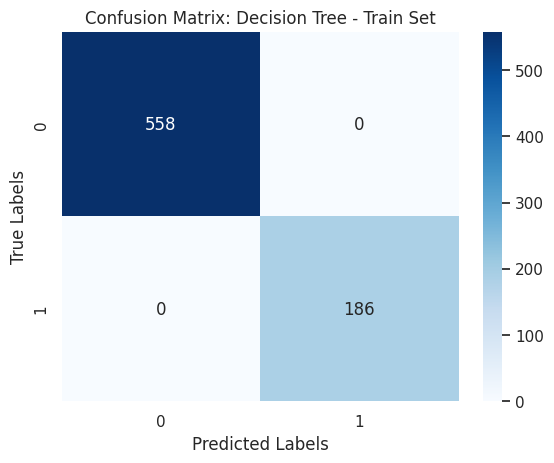


 
  Model:Decision Tree- Test Set - Accuracy: 0.84 -Precision 0.07 - Recall: 0.58 - F1 : 0.12 - AUC-ROC : 0.71


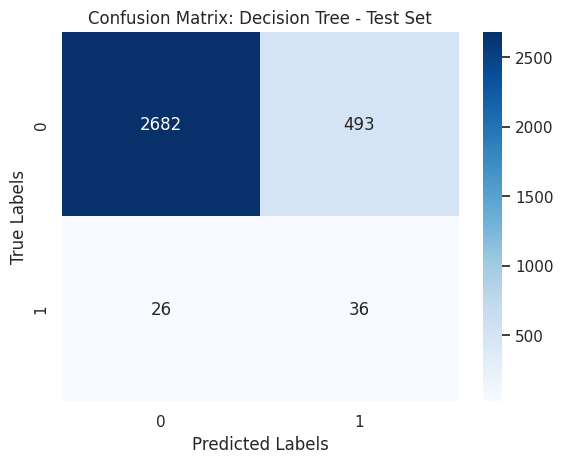


 
 Model:Random Forest- Train Set - Accuracy: 1.0 -Precision: 1.0 - Recall: 1.0 - F1 : 1.0 - AUC-ROC : 1.0


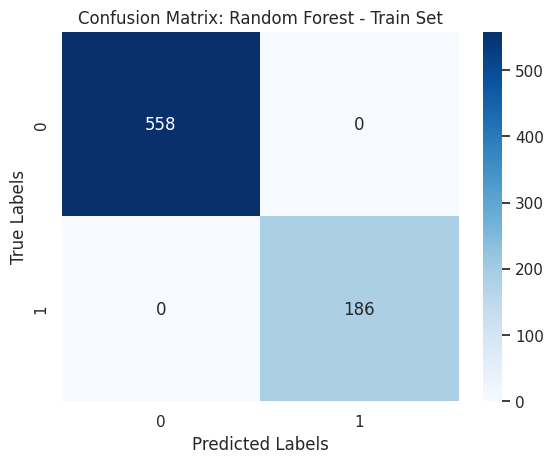


 
  Model:Random Forest- Test Set - Accuracy: 0.92 -Precision 0.13 - Recall: 0.55 - F1 : 0.21 - AUC-ROC : 0.74


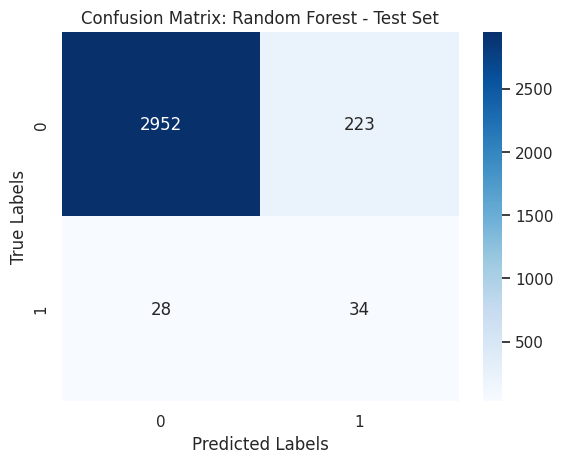


 
 Model:kNN- Train Set - Accuracy: 0.85 -Precision: 0.74 - Recall: 0.62 - F1 : 0.67 - AUC-ROC : 0.77


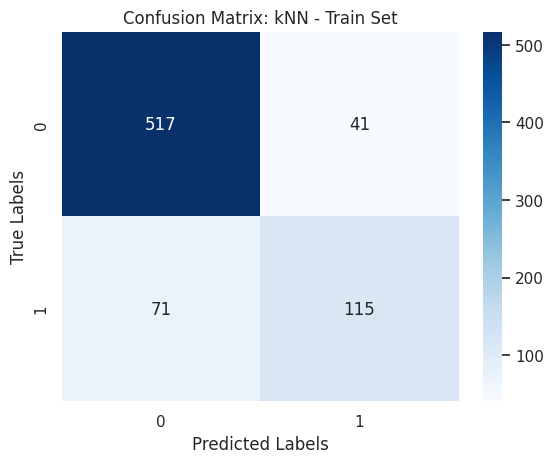


 
  Model:kNN- Test Set - Accuracy: 0.88 -Precision 0.09 - Recall: 0.53 - F1 : 0.15 - AUC-ROC : 0.71


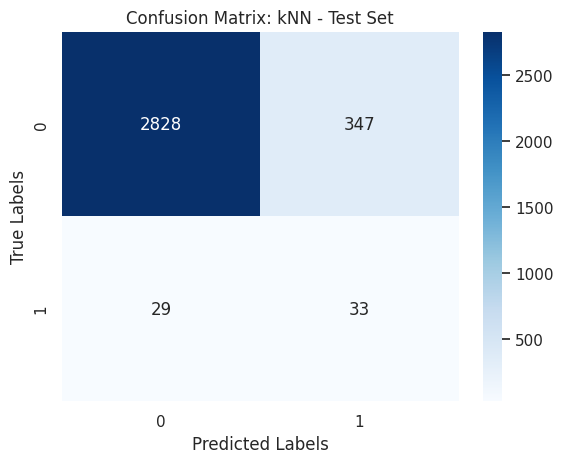


 
 Model:Naive Bayes- Train Set - Accuracy: 0.79 -Precision: 0.61 - Recall: 0.46 - F1 : 0.53 - AUC-ROC : 0.68


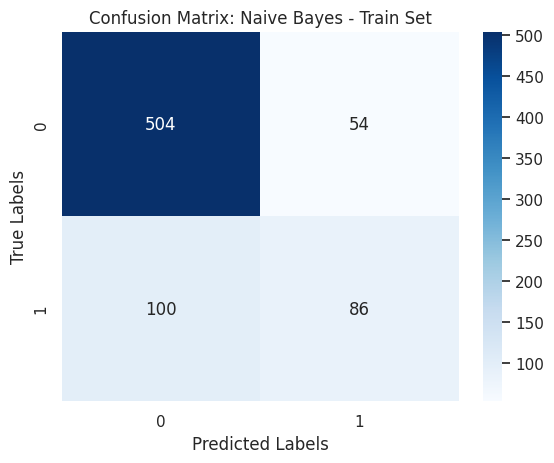


 
  Model:Naive Bayes- Test Set - Accuracy: 0.88 -Precision 0.08 - Recall: 0.48 - F1 : 0.13 - AUC-ROC : 0.69


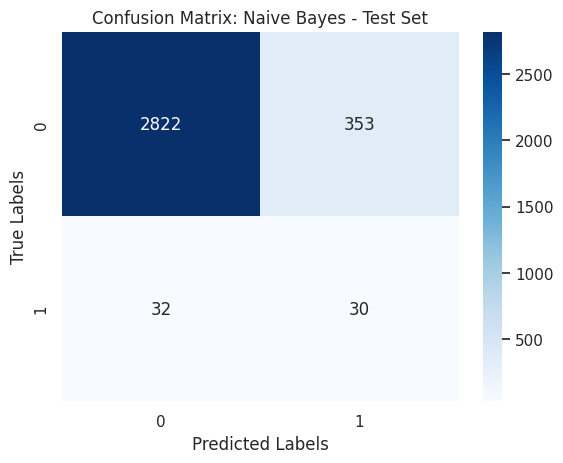


 
 Model:SVM- Train Set - Accuracy: 0.84 -Precision: 0.76 - Recall: 0.51 - F1 : 0.61 - AUC-ROC : 0.73


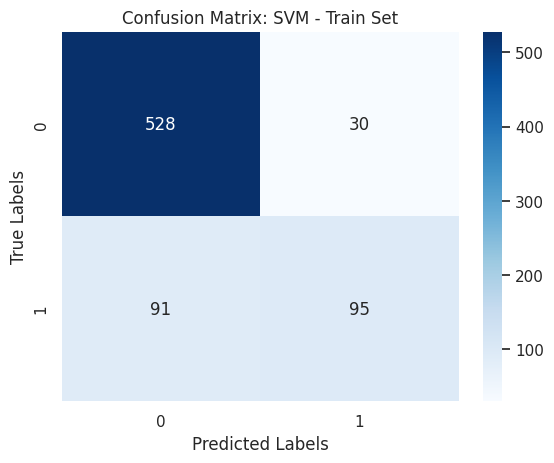


 
  Model:SVM- Test Set - Accuracy: 0.92 -Precision 0.12 - Recall: 0.52 - F1 : 0.2 - AUC-ROC : 0.72


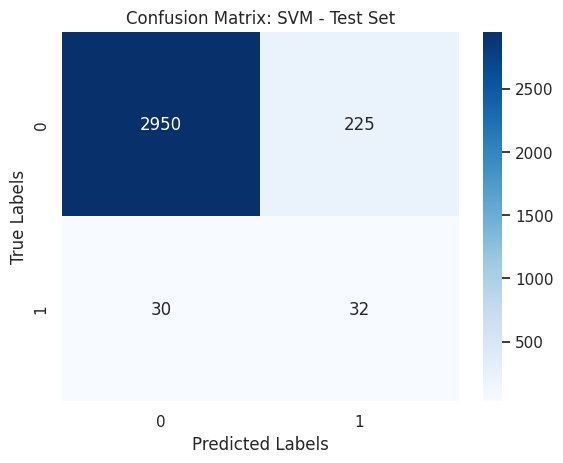


 
 Model:Gradient Boosting Classifier- Train Set - Accuracy: 0.96 -Precision: 0.95 - Recall: 0.89 - F1 : 0.92 - AUC-ROC : 0.94


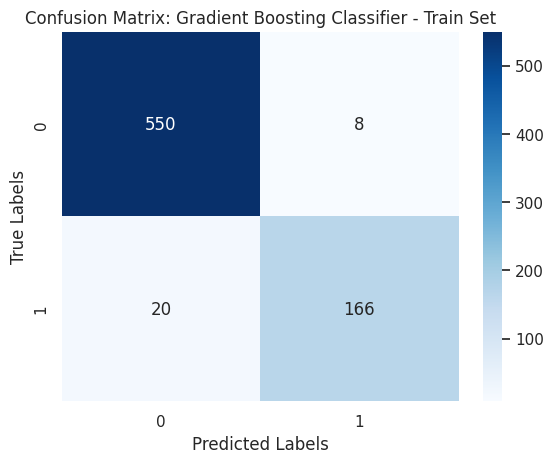


 
  Model:Gradient Boosting Classifier- Test Set - Accuracy: 0.91 -Precision 0.12 - Recall: 0.6 - F1 : 0.2 - AUC-ROC : 0.75


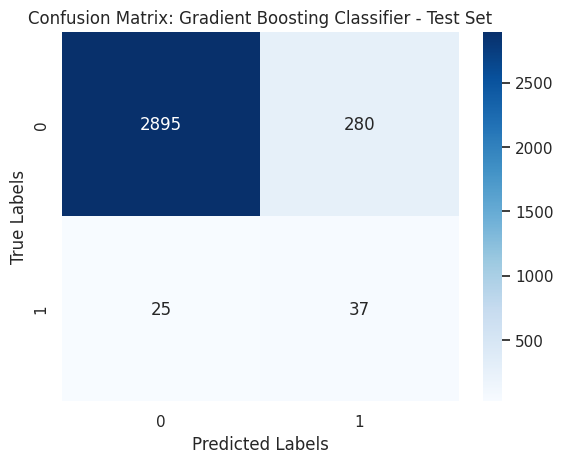


 Fold 2:
Train - Healthy companies: 558, Bankrupt companies: 186
Test - Healthy companies: 3175, Bankrupt companies: 62



 
 Model:Linear Discriminant Analysis- Train Set - Accuracy: 0.8 -Precision: 0.66 - Recall: 0.38 - F1 : 0.48 - AUC-ROC : 0.66


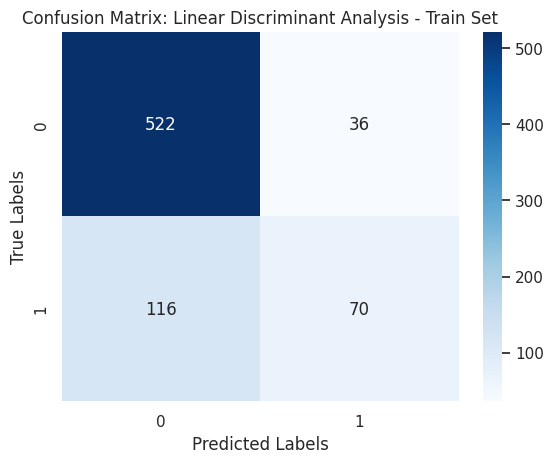


 
  Model:Linear Discriminant Analysis- Test Set - Accuracy: 0.92 -Precision 0.13 - Recall: 0.5 - F1 : 0.2 - AUC-ROC : 0.72


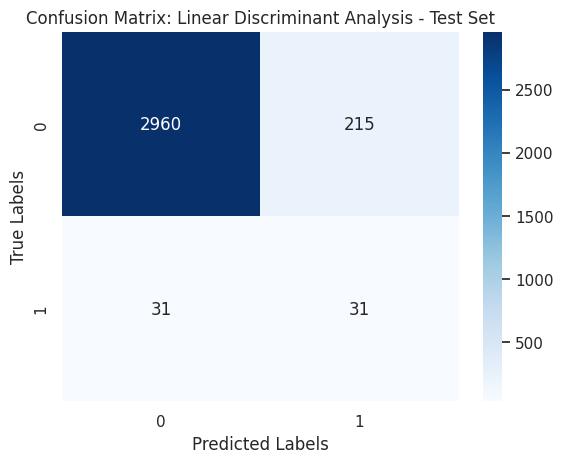


 
 Model:Logistic Regression- Train Set - Accuracy: 0.79 -Precision: 0.66 - Recall: 0.31 - F1 : 0.42 - AUC-ROC : 0.63


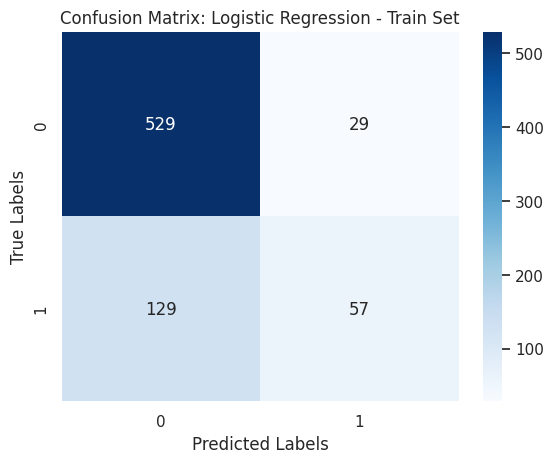


 
  Model:Logistic Regression- Test Set - Accuracy: 0.94 -Precision 0.13 - Recall: 0.44 - F1 : 0.21 - AUC-ROC : 0.69


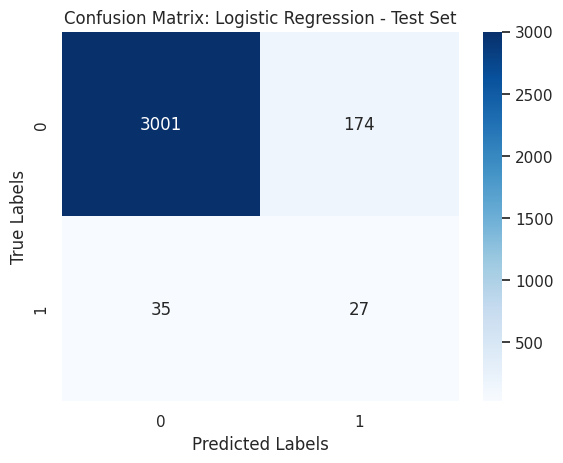


 
 Model:Decision Tree- Train Set - Accuracy: 1.0 -Precision: 1.0 - Recall: 1.0 - F1 : 1.0 - AUC-ROC : 1.0


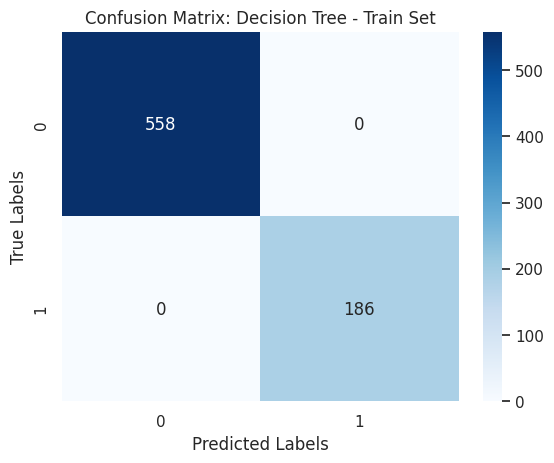


 
  Model:Decision Tree- Test Set - Accuracy: 0.85 -Precision 0.05 - Recall: 0.4 - F1 : 0.09 - AUC-ROC : 0.63


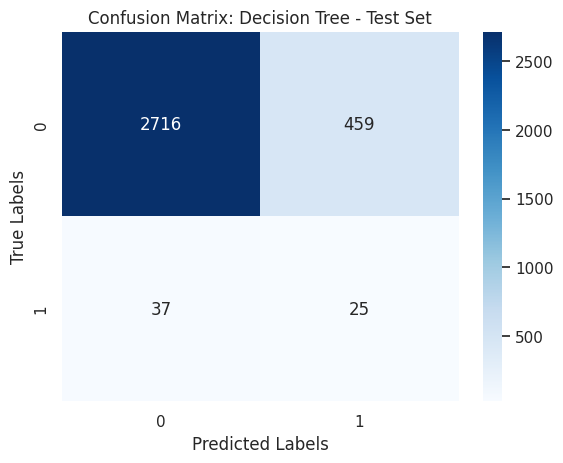


 
 Model:Random Forest- Train Set - Accuracy: 1.0 -Precision: 1.0 - Recall: 1.0 - F1 : 1.0 - AUC-ROC : 1.0


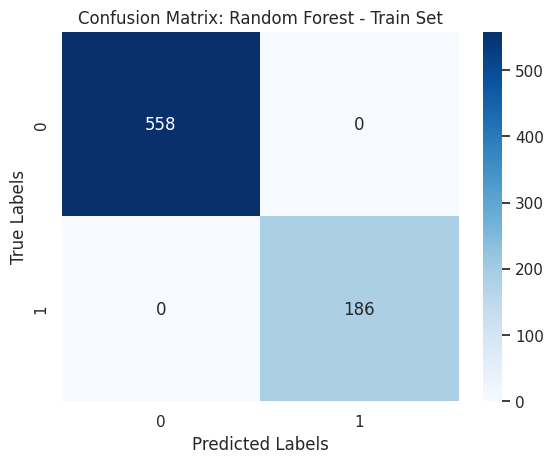


 
  Model:Random Forest- Test Set - Accuracy: 0.94 -Precision 0.18 - Recall: 0.56 - F1 : 0.28 - AUC-ROC : 0.76


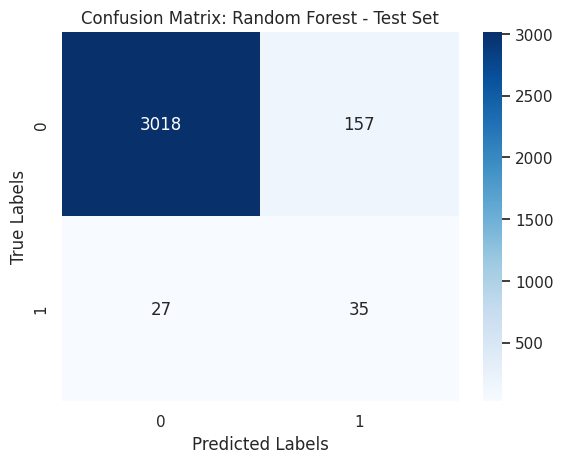


 
 Model:kNN- Train Set - Accuracy: 0.84 -Precision: 0.73 - Recall: 0.58 - F1 : 0.65 - AUC-ROC : 0.76


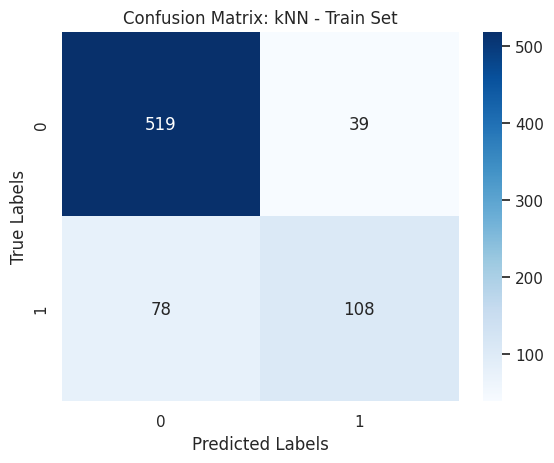


 
  Model:kNN- Test Set - Accuracy: 0.9 -Precision 0.09 - Recall: 0.5 - F1 : 0.16 - AUC-ROC : 0.7


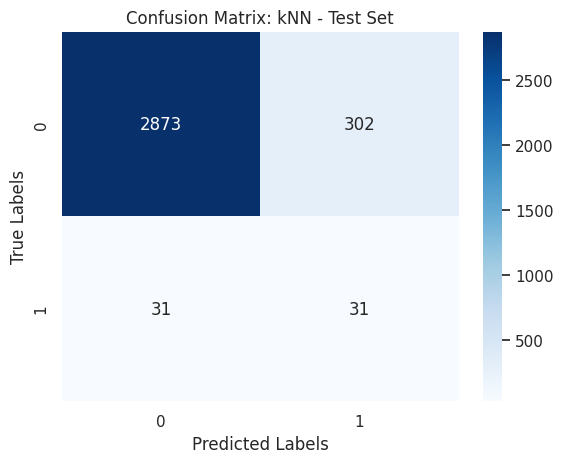


 
 Model:Naive Bayes- Train Set - Accuracy: 0.8 -Precision: 0.6 - Recall: 0.55 - F1 : 0.57 - AUC-ROC : 0.71


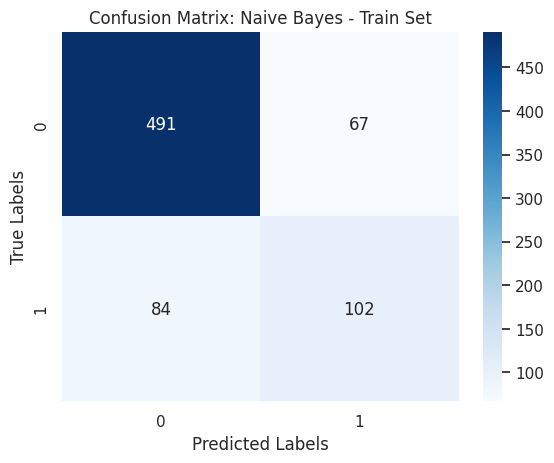


 
  Model:Naive Bayes- Test Set - Accuracy: 0.86 -Precision 0.09 - Recall: 0.69 - F1 : 0.16 - AUC-ROC : 0.78


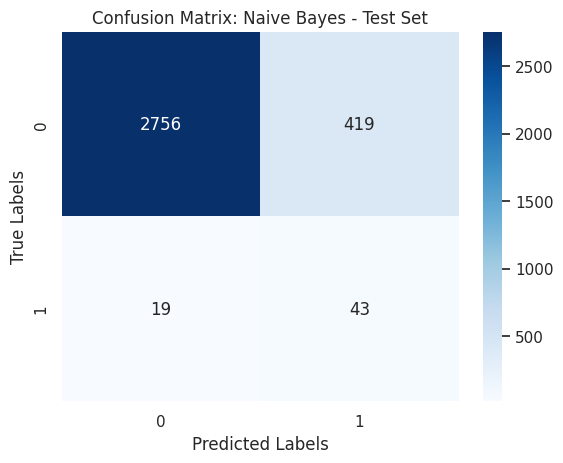


 
 Model:SVM- Train Set - Accuracy: 0.82 -Precision: 0.8 - Recall: 0.38 - F1 : 0.51 - AUC-ROC : 0.67


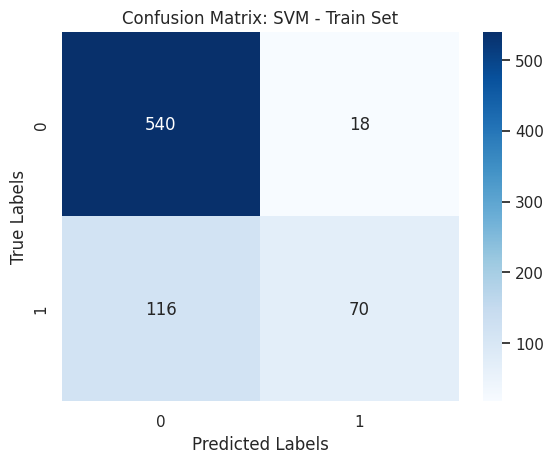


 
  Model:SVM- Test Set - Accuracy: 0.95 -Precision 0.17 - Recall: 0.45 - F1 : 0.25 - AUC-ROC : 0.7


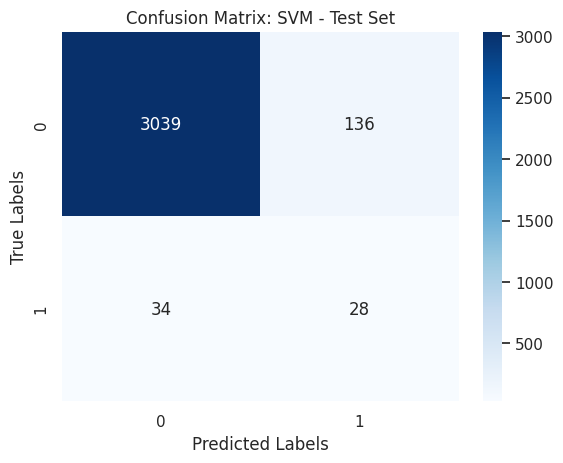


 
 Model:Gradient Boosting Classifier- Train Set - Accuracy: 0.94 -Precision: 0.94 - Recall: 0.81 - F1 : 0.87 - AUC-ROC : 0.9


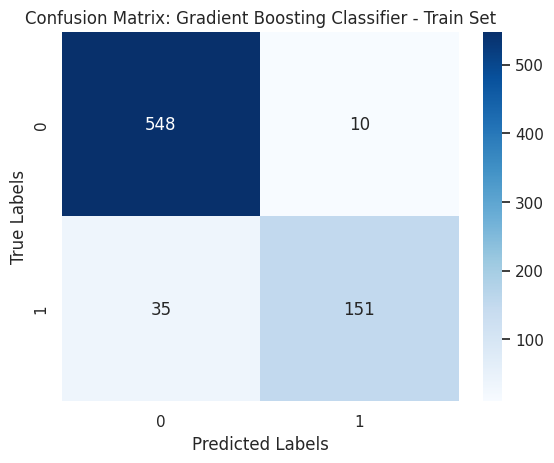


 
  Model:Gradient Boosting Classifier- Test Set - Accuracy: 0.92 -Precision 0.13 - Recall: 0.56 - F1 : 0.21 - AUC-ROC : 0.74


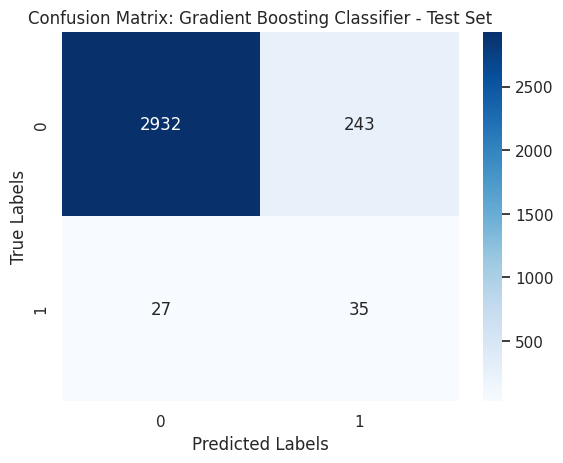


 Fold 3:
Train - Healthy companies: 558, Bankrupt companies: 186
Test - Healthy companies: 3175, Bankrupt companies: 62



 
 Model:Linear Discriminant Analysis- Train Set - Accuracy: 0.81 -Precision: 0.67 - Recall: 0.44 - F1 : 0.53 - AUC-ROC : 0.68


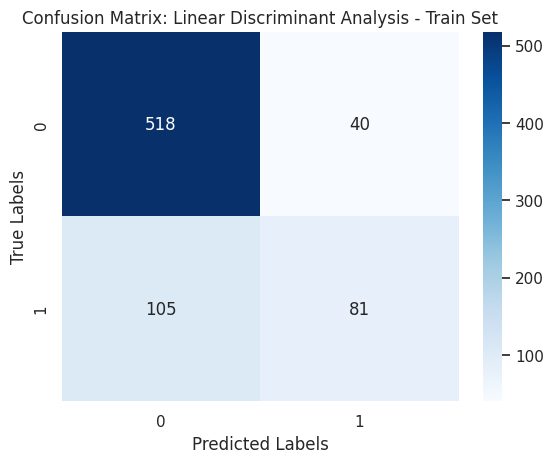


 
  Model:Linear Discriminant Analysis- Test Set - Accuracy: 0.92 -Precision 0.08 - Recall: 0.31 - F1 : 0.13 - AUC-ROC : 0.62


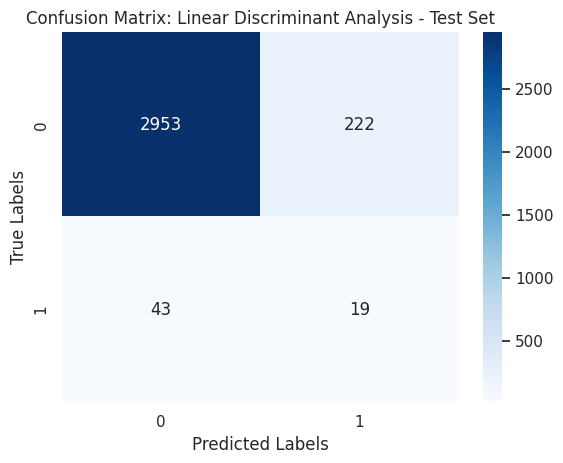


 
 Model:Logistic Regression- Train Set - Accuracy: 0.8 -Precision: 0.68 - Recall: 0.38 - F1 : 0.49 - AUC-ROC : 0.66


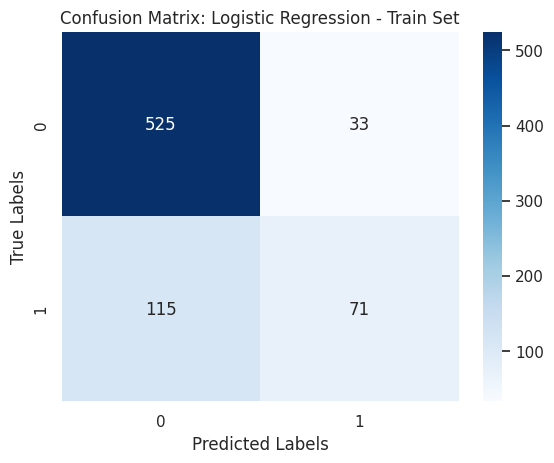


 
  Model:Logistic Regression- Test Set - Accuracy: 0.92 -Precision 0.07 - Recall: 0.23 - F1 : 0.1 - AUC-ROC : 0.58


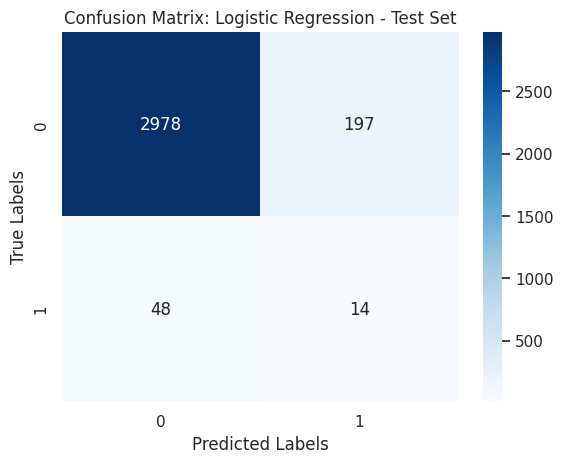


 
 Model:Decision Tree- Train Set - Accuracy: 1.0 -Precision: 1.0 - Recall: 1.0 - F1 : 1.0 - AUC-ROC : 1.0


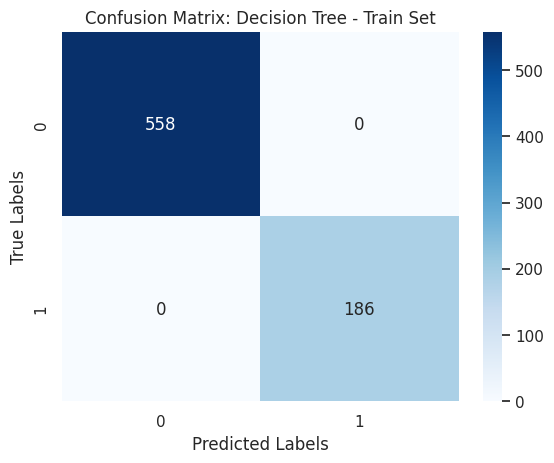


 
  Model:Decision Tree- Test Set - Accuracy: 0.87 -Precision 0.06 - Recall: 0.39 - F1 : 0.1 - AUC-ROC : 0.63


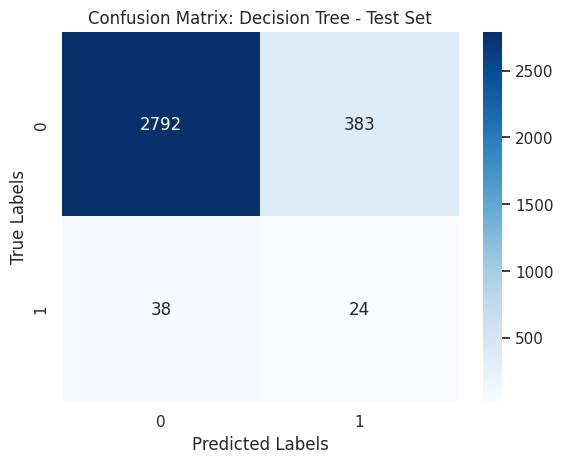


 
 Model:Random Forest- Train Set - Accuracy: 1.0 -Precision: 1.0 - Recall: 1.0 - F1 : 1.0 - AUC-ROC : 1.0


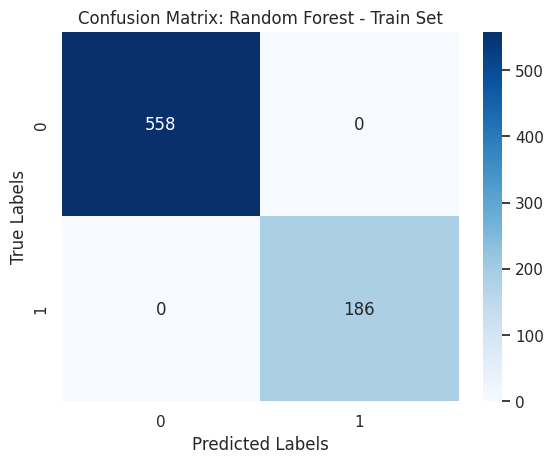


 
  Model:Random Forest- Test Set - Accuracy: 0.93 -Precision 0.12 - Recall: 0.4 - F1 : 0.19 - AUC-ROC : 0.67


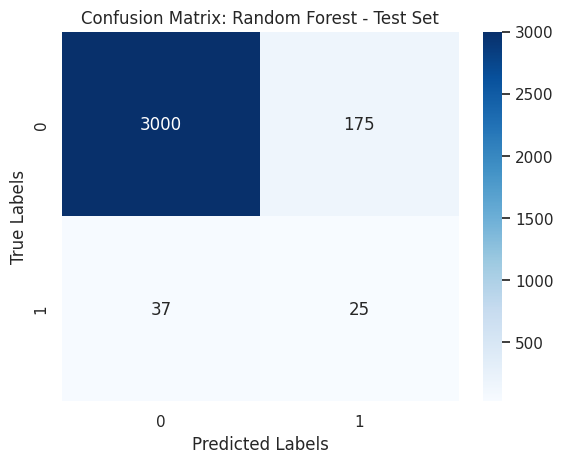


 
 Model:kNN- Train Set - Accuracy: 0.85 -Precision: 0.75 - Recall: 0.6 - F1 : 0.66 - AUC-ROC : 0.77


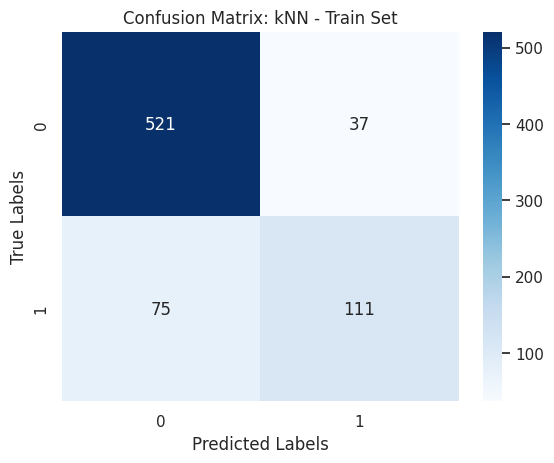


 
  Model:kNN- Test Set - Accuracy: 0.9 -Precision 0.06 - Recall: 0.27 - F1 : 0.09 - AUC-ROC : 0.59


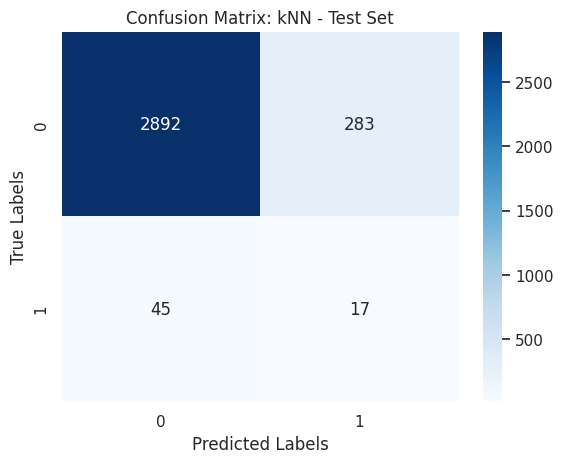


 
 Model:Naive Bayes- Train Set - Accuracy: 0.77 -Precision: 0.54 - Recall: 0.49 - F1 : 0.52 - AUC-ROC : 0.68


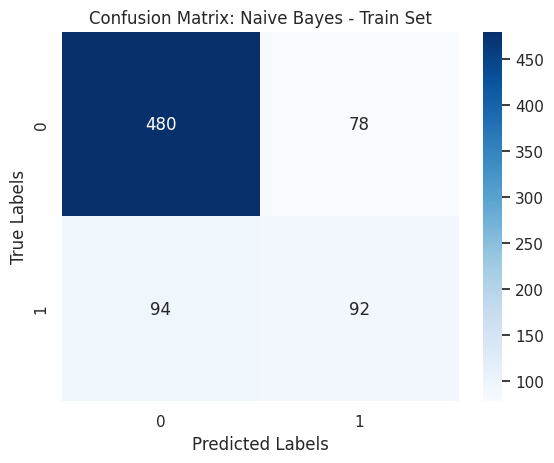


 
  Model:Naive Bayes- Test Set - Accuracy: 0.86 -Precision 0.05 - Recall: 0.35 - F1 : 0.09 - AUC-ROC : 0.61


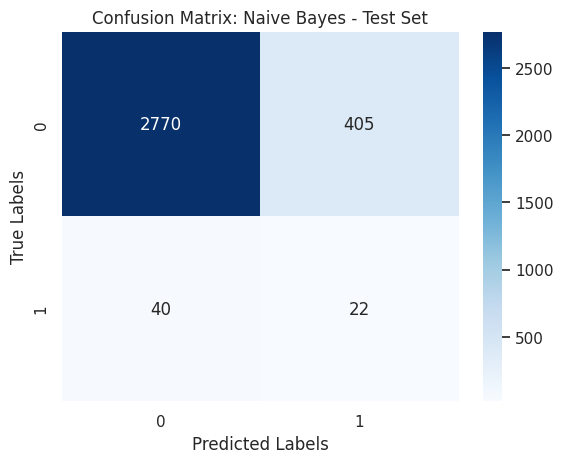


 
 Model:SVM- Train Set - Accuracy: 0.83 -Precision: 0.79 - Recall: 0.46 - F1 : 0.58 - AUC-ROC : 0.71


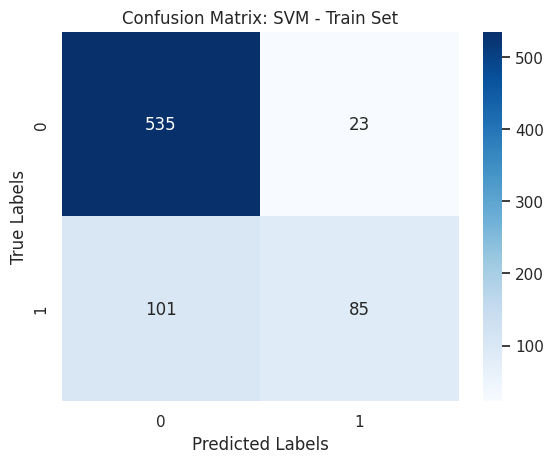


 
  Model:SVM- Test Set - Accuracy: 0.94 -Precision 0.08 - Recall: 0.24 - F1 : 0.12 - AUC-ROC : 0.6


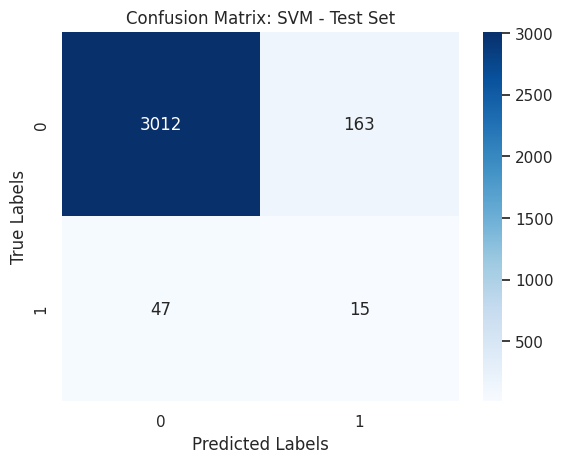


 
 Model:Gradient Boosting Classifier- Train Set - Accuracy: 0.95 -Precision: 0.95 - Recall: 0.84 - F1 : 0.89 - AUC-ROC : 0.91


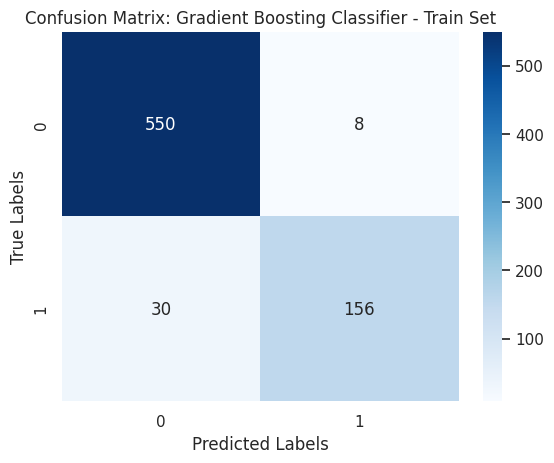


 
  Model:Gradient Boosting Classifier- Test Set - Accuracy: 0.92 -Precision 0.09 - Recall: 0.34 - F1 : 0.14 - AUC-ROC : 0.64


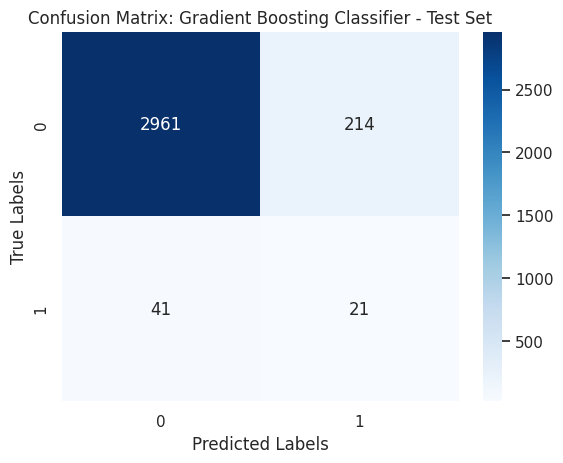


 Fold 4:
Train - Healthy companies: 558, Bankrupt companies: 186
Test - Healthy companies: 3175, Bankrupt companies: 62



 
 Model:Linear Discriminant Analysis- Train Set - Accuracy: 0.81 -Precision: 0.72 - Recall: 0.41 - F1 : 0.53 - AUC-ROC : 0.68


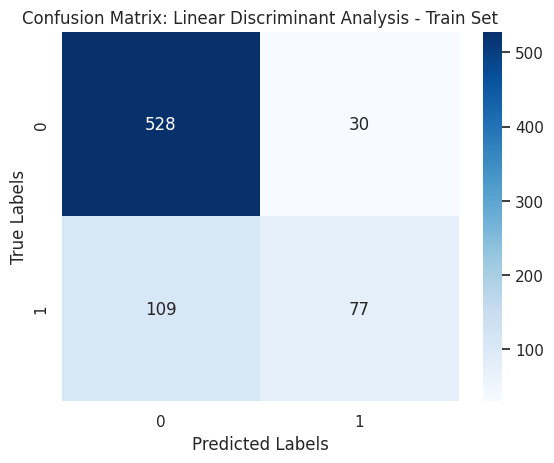


 
  Model:Linear Discriminant Analysis- Test Set - Accuracy: 0.92 -Precision 0.09 - Recall: 0.34 - F1 : 0.14 - AUC-ROC : 0.63


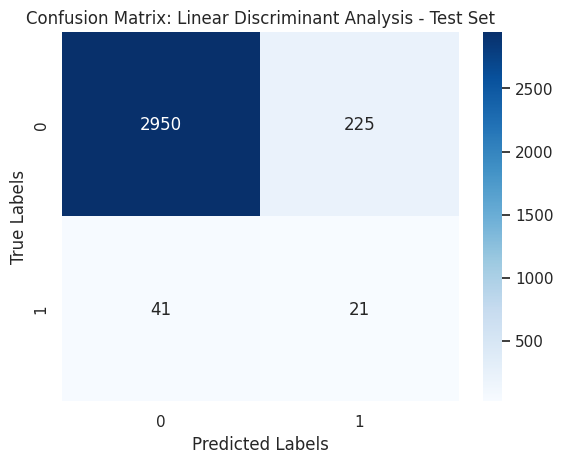


 
 Model:Logistic Regression- Train Set - Accuracy: 0.81 -Precision: 0.73 - Recall: 0.39 - F1 : 0.51 - AUC-ROC : 0.67


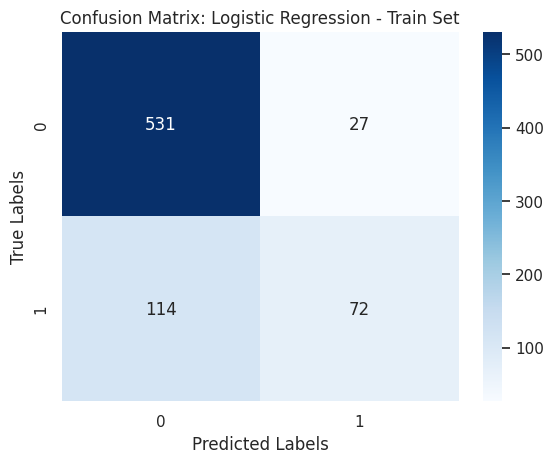


 
  Model:Logistic Regression- Test Set - Accuracy: 0.93 -Precision 0.09 - Recall: 0.32 - F1 : 0.14 - AUC-ROC : 0.63


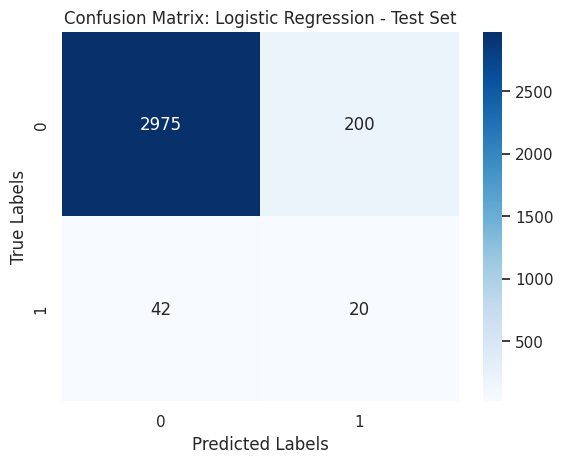


 
 Model:Decision Tree- Train Set - Accuracy: 1.0 -Precision: 1.0 - Recall: 1.0 - F1 : 1.0 - AUC-ROC : 1.0


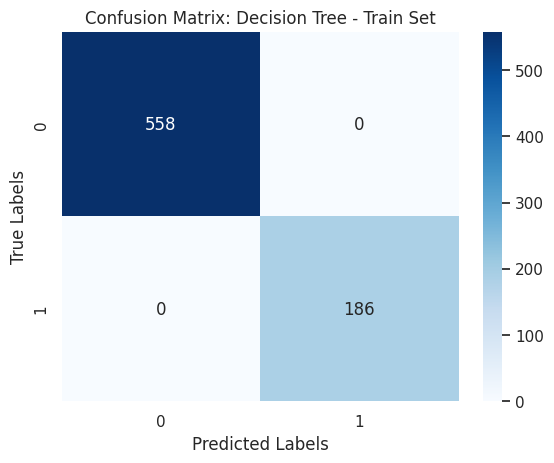


 
  Model:Decision Tree- Test Set - Accuracy: 0.85 -Precision 0.06 - Recall: 0.5 - F1 : 0.11 - AUC-ROC : 0.68


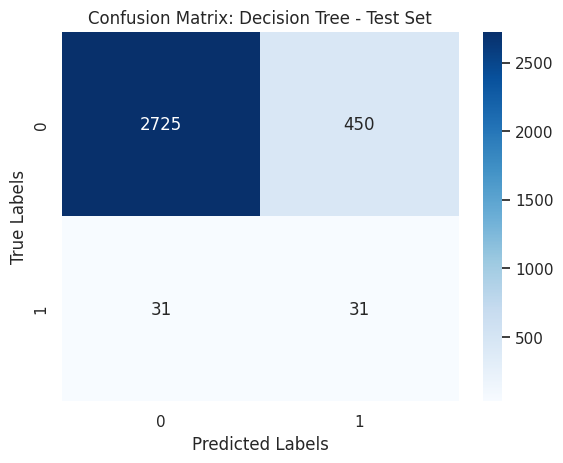


 
 Model:Random Forest- Train Set - Accuracy: 1.0 -Precision: 1.0 - Recall: 1.0 - F1 : 1.0 - AUC-ROC : 1.0


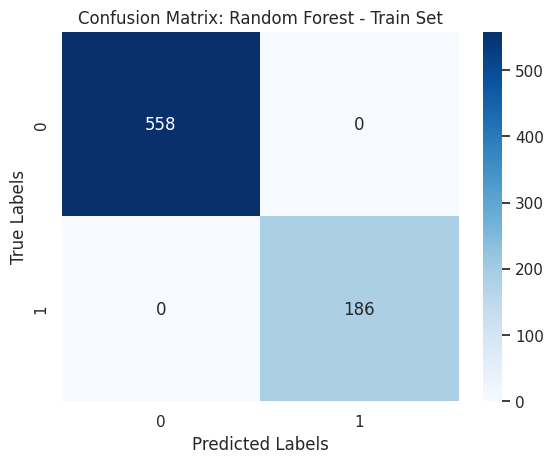


 
  Model:Random Forest- Test Set - Accuracy: 0.93 -Precision 0.14 - Recall: 0.5 - F1 : 0.22 - AUC-ROC : 0.72


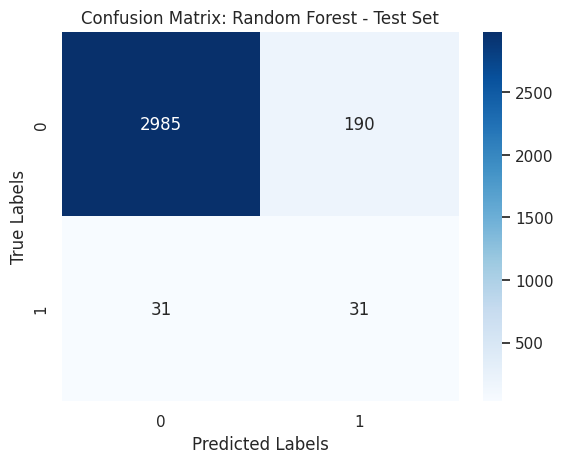


 
 Model:kNN- Train Set - Accuracy: 0.87 -Precision: 0.84 - Recall: 0.61 - F1 : 0.7 - AUC-ROC : 0.78


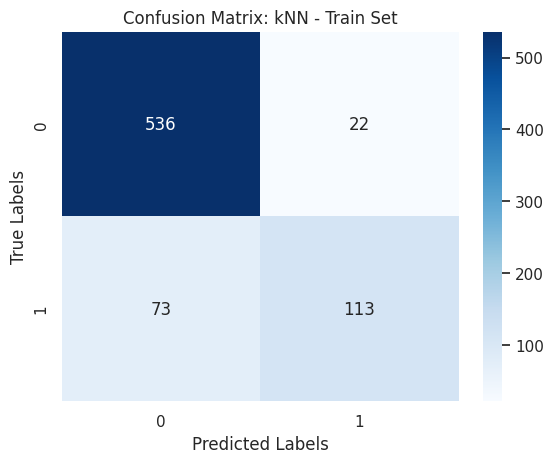


 
  Model:kNN- Test Set - Accuracy: 0.9 -Precision 0.09 - Recall: 0.5 - F1 : 0.16 - AUC-ROC : 0.7


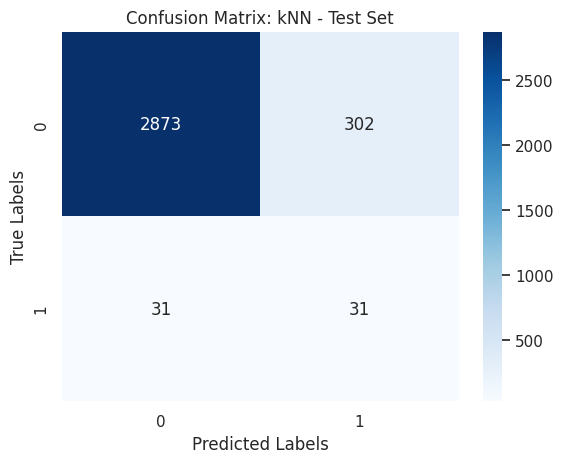


 
 Model:Naive Bayes- Train Set - Accuracy: 0.8 -Precision: 0.62 - Recall: 0.53 - F1 : 0.57 - AUC-ROC : 0.71


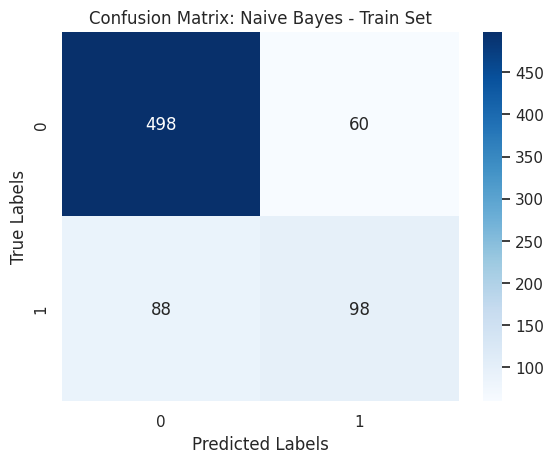


 
  Model:Naive Bayes- Test Set - Accuracy: 0.87 -Precision 0.08 - Recall: 0.52 - F1 : 0.14 - AUC-ROC : 0.7


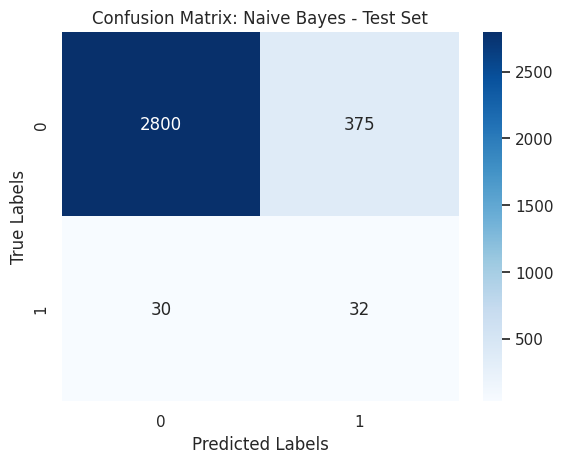


 
 Model:SVM- Train Set - Accuracy: 0.84 -Precision: 0.82 - Recall: 0.46 - F1 : 0.59 - AUC-ROC : 0.71


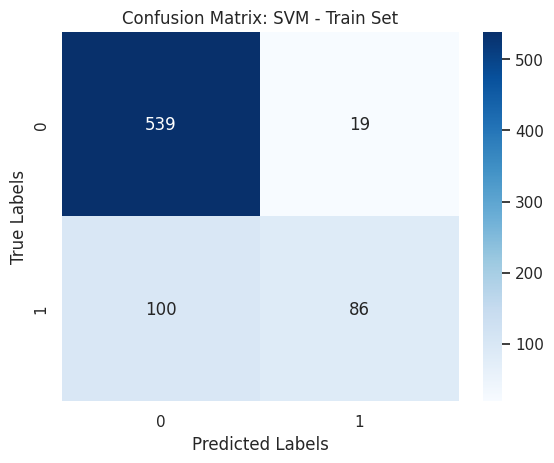


 
  Model:SVM- Test Set - Accuracy: 0.93 -Precision 0.11 - Recall: 0.39 - F1 : 0.17 - AUC-ROC : 0.66


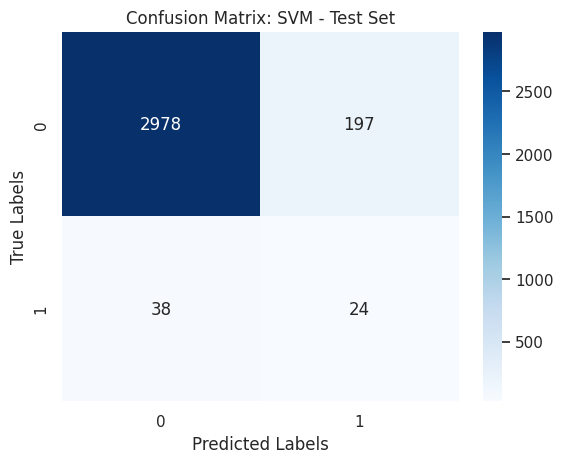


 
 Model:Gradient Boosting Classifier- Train Set - Accuracy: 0.95 -Precision: 0.96 - Recall: 0.84 - F1 : 0.9 - AUC-ROC : 0.91


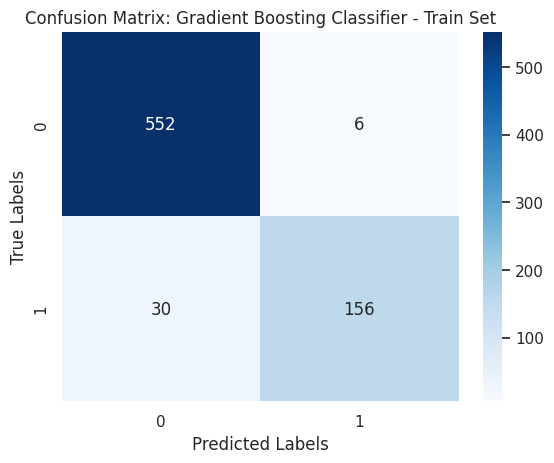


 
  Model:Gradient Boosting Classifier- Test Set - Accuracy: 0.92 -Precision 0.12 - Recall: 0.5 - F1 : 0.19 - AUC-ROC : 0.71


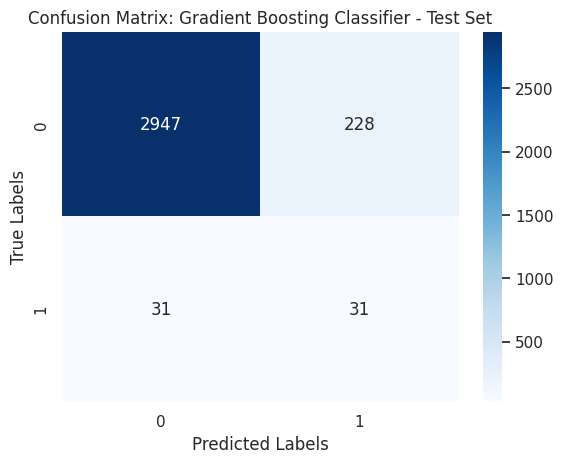

In [8]:
for fold, (train_index, test_index) in enumerate(skf4.split(X,y), 1):
  X_train, X_test = X.iloc[train_index], X.iloc[test_index]
  y_train, y_test = y.iloc[train_index], y.iloc[test_index]

  # Concatenate X_train and y_train to create a DataFrame for easy manipulation
  train_data = pd.concat([X_train, y_train], axis=1)

# Identify unhealthy and healthy samples
  #train_data.rename(columns={'ΕΝΔΕΙΞΗ ΑΣΥΝΕΠΕΙΑΣ (=2) (ν+1)': 'status'}, inplace=True)
  unhealthy_samples = train_data[train_data['ΕΝΔΕΙΞΗ ΑΣΥΝΕΠΕΙΑΣ (=2) (ν+1)'] == 1]
  healthy_samples = train_data[train_data['ΕΝΔΕΙΞΗ ΑΣΥΝΕΠΕΙΑΣ (=2) (ν+1)'] == 0]

# Calculate the number of healthy samples needed to achieve a 3:1 ratio
  desired_healthy_samples = len(unhealthy_samples) * 3

# Randomly select a subset of healthy samples to achieve the desired ratio
  selected_healthy_samples = healthy_samples.sample(n=min(desired_healthy_samples, len(healthy_samples)), random_state=42)

# Concatenate unhealthy samples with the remaining healthy samples to create the balanced training data
  balanced_train_data = pd.concat([unhealthy_samples, selected_healthy_samples])

# Shuffle the dataframe to mix healthy and unhealthy samples
  balanced_train_data = balanced_train_data.sample(frac=1, random_state=42)

# Separate X_train and y_train from the balanced training data
  X_train_balanced = balanced_train_data.drop('ΕΝΔΕΙΞΗ ΑΣΥΝΕΠΕΙΑΣ (=2) (ν+1)', axis=1)
  y_train_balanced = balanced_train_data['ΕΝΔΕΙΞΗ ΑΣΥΝΕΠΕΙΑΣ (=2) (ν+1)']

# Move the selected healthy samples from X_train and y_train to X_test and y_test
  X_test = pd.concat([X_test, selected_healthy_samples.drop('ΕΝΔΕΙΞΗ ΑΣΥΝΕΠΕΙΑΣ (=2) (ν+1)', axis=1)])
  y_test = pd.concat([y_test, selected_healthy_samples['ΕΝΔΕΙΞΗ ΑΣΥΝΕΠΕΙΑΣ (=2) (ν+1)']])

# Shuffle the test set
  test_shuffle_index = np.random.permutation(len(X_test))
  X_test = X_test.iloc[test_shuffle_index]
  y_test = y_test.iloc[test_shuffle_index]


# Print Results
  print(f"\n Fold {fold}:")
  print(f"Train - Healthy companies: {y_train_balanced[y_train_balanced==0].count()}, Bankrupt companies: {y_train_balanced[y_train_balanced==1].count()}")
  print(f"Test - Healthy companies: {y_test[y_test==0].count()}, Bankrupt companies: {y_test[y_test==1].count()}")
  print("\n")

  for model_name,model in models.items():
    model.fit(X_train_balanced , y_train_balanced)

    #Train predictions, confusion matrix , scores
    train_predictions = model.predict(X_train_balanced)
    train_cm = confusion_matrix(y_train_balanced , train_predictions)
    train_tp, train_tn, train_fp, train_fn = train_cm[1, 1], train_cm[0, 0], train_cm[0, 1], train_cm[1, 0]
    train_accuracy = (train_tp + train_tn) / (train_tp + train_tn + train_fp + train_fn)
    train_precision = (train_tp)/(train_tp + train_fp)
    train_recall = train_tp / (train_tp + train_fn)
    train_f1 = (2*train_tp) / (2*train_tp + train_fp + train_fn)
    train_roc_auc = roc_auc_score(y_train_balanced, train_predictions)
    print(f"\n \n Model:{model_name}- Train Set - Accuracy: {round(train_accuracy,2)} -Precision: {round(train_precision,2)} - Recall: {round(train_recall,2)} - F1 : {round(train_f1,2)} - AUC-ROC : {round(train_roc_auc,2)}")
    sns.heatmap(train_cm, annot=True, fmt="d", cmap="Blues")
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.title(f"Confusion Matrix: {model_name} - Train Set")
    plt.show()
    result = [fold, model_name , "Train Set" , "Balanced Set" , len(y_train_balanced), y_train_balanced[y_train_balanced==1].count(), train_tp, train_tn, train_fp, train_fn, train_roc_auc]
    results = results.append(pd.Series(result, index=results.columns), ignore_index=True)
    results2 = results.append(pd.Series(result, index=results.columns), ignore_index=True)



    #Test prediction, confusion matrix, scores
    test_predictions = model.predict(X_test)
    test_cm = confusion_matrix(y_test , test_predictions)
    test_accuracy = accuracy_score(y_test, test_predictions)
    test_tp, test_tn, test_fp, test_fn = test_cm[1, 1], test_cm[0, 0],  test_cm[0, 1], test_cm[1, 0]
    test_accuracy = (test_tp + test_tn) / (test_tp + test_tn + test_fp + test_fn)
    test_precision = (test_tp)/(test_tp + test_fp)
    test_recall = test_tp / (test_tp + test_fn)
    test_f1 = (2*test_tp) / (2*test_tp + test_fp + test_fn)
    test_roc_auc = roc_auc_score(y_test, test_predictions)
    print(f"\n \n  Model:{model_name}- Test Set - Accuracy: {round(test_accuracy,2)} -Precision {round(test_precision,2)} - Recall: {round(test_recall,2)} - F1 : {round(test_f1,2)} - AUC-ROC : {round(test_roc_auc,2)}")
    sns.heatmap(test_cm, annot=True, fmt="d", cmap="Blues")
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.title(f"Confusion Matrix: {model_name} - Test Set")
    plt.show()
    result = [fold, model_name , "Test Set" , "Balanced Set" , len(y_test), y_test[y_test==1].count(), test_tp, test_tn, test_fp, test_fn, test_roc_auc]
    results = results.append(pd.Series(result, index=results.columns), ignore_index=True)
    results2 = results.append(pd.Series(result, index=results.columns), ignore_index=True)




**Create .xlsx file**


In [9]:
from google.colab import files

#Create .csv files for balanced and unbalanced
results1.to_csv('unbalancedDataOutcomes.csv', index=False)
results2.to_csv('balancedDataOutcomes.csv', index=False)

#Create .xlsx file
results.to_excel('results.xlsx', index=False)

#Download file
files.download('results.xlsx')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>